<img src="https://www.th-koeln.de/img/logo.svg" style="float: right;" width="200">

# 8th exercise: <font color="#C70039">Fight overfitting in CNNs using data augmentation</font>
* Course: DIS21a.1
* Lecturer: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Author of notebook modifications and adaptations: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Student: Maximilian Pekarski
* Matriculation number: 11120099
* Date:   16.01.2023

<img src="https://miro.medium.com/max/700/1*bqNylp7FcqIBWg0DrcimUw.png" style="float: center;" width="600">

---------------------------------
**GENERAL NOTE 1**: 
Please make sure you are reading the entire notebook, since it contains a lot of information about your tasks (e.g. regarding the set of certain paramaters or specific computational tricks, etc.), and the written mark downs as well as comments contain a lot of information on how things work together as a whole. 

**GENERAL NOTE 2**: 
* Please, when commenting source code, just use English language only. 
* When describing an observation (for instance, after you have run through your test plan) you may use German language.
This applies to all exercises in DIS 21a.1.  

---------------------

### <font color="ce33ff">DESCRIPTION</font>:

This notebook allows for learning how you effectively fight overfitting when using convolutional neural networks (CNN) with small data sets. Training an image classification model using only very little data is a very common situation whenever working in computer vision within a professional context.

It is not possible to train a CNN to solve a complex problem with just a few tens of samples, but a few hundreds can 
potentially suffice if the model is small and well-regularized and if the task is simple. 

Because CNNs learn local, translation-invariant features, they are very data-efficient on perceptual problems. 
Training a CNN from scratch on a very small image dataset will still yield reasonable results despite a relative lack of data, without the need for any custom feature engineering. You will see this in action in this exercise.

This exercise focuses on classifying images as "dogs" or "cats", in a dataset containing 4000 pictures of cats and dogs (2000 cats, 2000 dogs). 2000 pictures are used for training, 1000 for validation, and finally 1000 for testing.

For the start, a small CNN is going to be trained on 2000 training samples, without any regularization for getting a performance baseline (classification accuracy). It will become obvious quite quickly that the main issue is overfitting. 
Then, *data augmentation* is going to be used, as you have learned it to be a powerful technique for fighting overfitting in computer vision.

-------------------------------------------------------------------------------------------------------------

### <font color="FFC300">TASKS</font>:
Within this notebook, the tasks that you need to work on are always listed as bullet points below. 
If a task is more challenging and consists of several steps, this is indicated as well. 
Make sure you have worked down the task list and commented your doings. 
This should be done using markdown.<br> 
<font color=red>Make sure you don't forget to specify your name and your matriculation number in the notebook before submitting it.</font>

**YOUR TASKS in this exercise are as follows**:
1. import the notebook to Google Colab.
2. make sure you specified you name and your matriculation number in the header below my name and date. 
    * set the date too and remove mine.
3. read the entire notebook carefully. 
    * for better understanding, add comments whereever you feel it necessary.
    * run the notebook for the first time and note the result in a markdown table. 
        * I have provided you with an example of a table in markdown (see below). Make sure you adapt your table accordingly. 
        * Put the table at the end of the notebook. 
        * This type of table will be needed in the other exercises as well. Always put it at the end.
    
| type of method | loss function | optimizer | accuracy |
| :-: | :-: | :-: | :-: |
| classification | categorical_crossentropy | bamm !|.666

4. given: batch_size=20 and size of training and validation data set.<br>
   Your task: Calculate 
    * steps_per_epoch=?
    * validation_steps=?
    
5. given: batch_size=32 and size of training and validation data set.<br>
    Your task: Calculate
    * steps_per_epoch=?
    * validation_steps=?

5. the original data set has got a total of 25.000 images (12.500 cats and 12.500 dogs, respectively).<br>
    Your task is to develop a test plan of the following kind:
    * take a randomly chosen stack of 4000 training, 2000 validation and 1000 testing images. Make sure that no image is used 
      twice in training and validation or testing. Change the hyperparameters accordingly.
      * <font color="red">NOTE:</font> make sure you save your model under different names every time you create a new one.
    * take a randomly chosen stack of 6000 training, 3000 validation and 1000 testing images. Make sure that no image is used 
      twice in training and validation or testing. Change the hyperparameters accordingly.

8. Do a hyperparameter optimization. Change the CNN's architecture according to your personal test plan. Store the performance values in a table as the one shown above, at the very end of the notebook. 

-----------------------------------------------------------------------------------

## START OF THE NOTEBOOK CODE
----------------------------------------------------------------------------------------------------------------------
### necessary imports
others are going to be included as soon as they are needed

In [2]:
import tensorflow
tensorflow.keras.__version__

'2.9.0'

### loading the cats and dogs data set

The cats and dogs data set is not packaged with Keras. It was made available by Kaggle.com as part of a computer vision competition in late 2013, back when CNNs were not quite mainstream yet. 

You can download the original data set at: 
`https://www.kaggle.com/c/dogs-vs-cats/data`

All pictures are color images using the jpg format (see example):
<img src="https://s3.amazonaws.com/book.keras.io/img/ch5/cats_vs_dogs_samples.jpg" style="float: center;" width="300">

The original data set contains 25.000 images of dogs and cats (12.500 of each class) and is, even though compressed, 543MB large. After downloading and uncompressing it, we will create a new data set containing three subsets: 
* a training set with 1000 samples of each class
* a validation set with 500 samples of each class
* a test set with 500 samples of each class.

Here is the code to do this:

In [3]:
import os, shutil

<font color="#C70039">NOTE:</font> Make sure you set the pathes according to your programming environment.

In [4]:
# The path to the directory where the original
# dataset is uncompressed
original_dataset_dir = '../data/kaggle_original_data'

# The directory where to
# store the smaller dataset
base_dir = '../data/cats_and_dogs_small'
if not os.path.exists(base_dir):
    os.mkdir(base_dir)

# Create the directories for the 
# training partition
train_dir = os.path.join(base_dir, 'train')
if not os.path.exists(train_dir):
    os.mkdir(train_dir)
    
# validation partition
validation_dir = os.path.join(base_dir, 'validation')
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)

# test partition
test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir):
    os.mkdir(test_dir)

print("train_dir=",train_dir)
print("validation_dir=",validation_dir)
print("test_dir=",test_dir)

train_dir= ../data/cats_and_dogs_small\train
validation_dir= ../data/cats_and_dogs_small\validation
test_dir= ../data/cats_and_dogs_small\test


Now create cat and dog subfolders within each data partition folder. Make sure to setting up the following folder structure.

<img src="https://miro.medium.com/max/700/1*HpvpA9pBJXKxaPCl5tKnLg.jpeg" style="float: center;" width="600">


In [5]:
# Directory with the training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
if not os.path.exists(train_cats_dir):
    os.mkdir(train_cats_dir)

# Directory with the training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
if not os.path.exists(train_dogs_dir):
    os.mkdir(train_dogs_dir)

# Directory with the validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
if not os.path.exists(validation_cats_dir):
    os.mkdir(validation_cats_dir)

# Directory with the validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if not os.path.exists(validation_dogs_dir):
    os.mkdir(validation_dogs_dir)

# Directory with the test cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
if not os.path.exists(test_cats_dir):
    os.mkdir(test_cats_dir)

# Directory with the test dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
if not os.path.exists(test_dogs_dir):
    os.mkdir(test_dogs_dir)

Now from the original data set, copy 

* 1000 cats and 1000 dogs into the training partition folder
* 500 cats and 500 dogs into the validation partition folder
* 500 cats and 500 dogs into the testing partition folder

In [8]:
# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy NEXT 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy NEXT 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

<font color="#C70039">Check</font>, whether all copying worked correctly.<br>
So, count how many pictures are in each cat and dog split of every partition (training/validation/testing).

In [16]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('--------------------------')
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('--------------------------')
print('total testing cat images:', len(os.listdir(test_cats_dir)))
print('total testing dog images:', len(os.listdir(test_dogs_dir)))
print('--------------------------')

total training cat images: 3000
total training dog images: 3000
--------------------------
total validation cat images: 1500
total validation dog images: 1500
--------------------------
total testing cat images: 500
total testing dog images: 500
--------------------------


## PART I
### building the CNN for baseline computation

From the last exercise the general structure of the CNN is reused, hence the CNN will be a stack of alternating `Conv2D` (with `relu` activation) and `MaxPooling2D` layers.

However, since this exercise is dealing with bigger images and a more complex problem, the CNN architecture should be made accordingly larger and should have one more `Conv2D` + `MaxPooling2D` stage. This serves both, to augment the capacity of the network and to further reduce the size of the feature maps, so that they are not by far to large when the `Flatten` layer is reached. Here, since the starting image size is 150x150 (an arbitrary choice btw), the feature maps can end with a size of 7x7 right before the `Flatten` layer.

Note that the depth of the feature maps is progressively increasing in the network (from 32 to 128), while the size of the feature maps is decreasing (from 148x148 to 7x7). This is a pattern that is typical for almost all CNNs.

Since the problem at hand is a binary classification problem, the network ends with a single unit (a `Dense` layer of size 1) and a `sigmoid` activation. This unit will encode the probability that the network is looking at one class or the other.

In [10]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))

model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Let's take a look at how the dimensions of the feature maps change with every successive layer:

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

<font color="#C70039">NOTE:</font> There are 2000 training images, and then 1000 validation images and 1000 test images. In each split, there is the same number of samples from each class (cats and dogs): since this is a balanced binary classification problem, it means that classification `accuracy` will be an appropriate measure of performance. <br>

For the compilation step take the `RMSprop` optimizer as usual. 
Since the network ends with a single sigmoid unit, use binary crossentropy as loss function 
(<font color="#C70039">CHECK:</font>The last page (p.216) of file `DIS21a.1-8.Tools.And.Strategies.For.Better.Results.pdf` can be used as a cheatsheet on what last layer activation and what loss function to use in the various situations).

In [14]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

### data preparation: generating image tensors from image files by using  `ImageDataGenerator()`

In general, data must be transformed into appropriately pre-processed floating point tensors before being fed into a neural network. 
Until now, the image data is packed into jpeg files, so the algorithm for transforming them is as follows:

1. Read the picture files.
2. Decode the JPEG content to RBG grids of pixels.
3. Convert these into floating point tensors.
4. Rescale the pixel values (between 0 and 255) to the [0,1] interval (min/max-standardization).

Luckily, Keras has got utilities to take care of these steps automatically. 
Keras has got a module with image processing helper tools, located at `keras.preprocessing.image`. 
In particular, it contains the class `ImageDataGenerator()` which allows to quickly set up Python generators that can automatically turn image files on disk into batches of pre-processed tensors. 

Let's have a look. The ImageDataGenerator class has three methods `flow()`, `flow_from_directory()` and `flow_from_dataframe()` to read images from a numpy array or from folders containing images.

If you are interested in diving deeper into the topic, this article is very recommendable.<br>
https://medium.com/@vijayabhaskar96/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720 

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be [0,1] standardized
train_datagen = ImageDataGenerator(rescale=1.0/255)
valid_datagen = ImageDataGenerator(rescale=1.0/255)

training_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since binary_crossentropy loss is used, binary labels are needed
        class_mode='binary')

validation_generator = valid_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Let's take a look at the output of, e.g. the training generator:<br>

In [16]:
for data_batch, labels_batch in training_generator:
    print('This is the shape of the training data batch:', data_batch.shape)
    print('This is the shape of the training label batch:', labels_batch.shape)
    break

This is the shape of the training data batch: (20, 150, 150, 3)
This is the shape of the training label batch: (20,)


It yields batches of 150x150 RGB images (shape `(20, 150, 150, 3)`) and binary labels (shape `(20,)`). 
20 is the number of samples in each batch (batch size=20). 

<font color="red">Note</font> that the generator works as an iterator and outputs these batches in an infinite loop over the images present in the destination folder. For this reason, the iteration loop must be interrupted at some point.

------

Let us fit our model to the data using the generator. We do it using the `fit` method as always. It expects as first argument a Python data generator that will yield batches of inputs and targets indefinitely, like the one from above does. 
Because the data is being generated endlessly, the generator needs to know how many samples to draw from the generator before declaring one epoch to be complete. 
This is the role of the `steps_per_epoch` argument: after having drawn `steps_per_epoch` batches from the generator, i.e. after having run for `steps_per_epoch` gradient descent steps, the fitting process will go to the next epoch. 

In this case here, batches are 20-sample large, so it will take 100 batches until we see our target of 2000 samples. Keep this in mind for being able to solve some of the tasks from the task list.

When using `fit`, a `validation_data` argument can be passed as well and like done many times before already. 
Importantly, also this argument is allowed to be a data generator itself, but it could be a tuple of Numpy arrays as well. 
If a generator is passed as `validation_data`, then this generator is expected to yield batches of validation data endlessly, and thus, again, the `validation_steps` argument needs to be specified, which tells the process how many batches to draw from the validation generator for evaluation. With this information the model can be trained now.

### training and validation in one pass using the history object

In [17]:
history = model.fit(
            training_generator,
            steps_per_epoch=100,
            epochs=30,
            validation_data=validation_generator,
            validation_steps=50)

Epoch 1/30
100/100 [==============================] - 21s 203ms/step - loss: 0.6920 - acc: 0.5360 - val_loss: 0.6763 - val_acc: 0.6210
Epoch 2/30
100/100 [==============================] - 13s 128ms/step - loss: 0.6539 - acc: 0.6195 - val_loss: 0.6337 - val_acc: 0.6490
Epoch 3/30
100/100 [==============================] - 13s 132ms/step - loss: 0.6064 - acc: 0.6695 - val_loss: 0.6264 - val_acc: 0.6330
Epoch 4/30
100/100 [==============================] - 13s 134ms/step - loss: 0.5634 - acc: 0.7105 - val_loss: 0.5913 - val_acc: 0.6780
Epoch 5/30
100/100 [==============================] - 13s 128ms/step - loss: 0.5236 - acc: 0.7365 - val_loss: 0.5785 - val_acc: 0.6840
Epoch 6/30
100/100 [==============================] - 13s 130ms/step - loss: 0.4976 - acc: 0.7565 - val_loss: 0.5736 - val_acc: 0.6970
Epoch 7/30
100/100 [==============================] - 13s 129ms/step - loss: 0.4727 - acc: 0.7810 - val_loss: 0.5521 - val_acc: 0.6940
Epoch 8/30
100/100 [==============================] - 1

### save the baseline classification model

It is good practice to always save your models after training.

In [18]:
model.save('cats_dogs_classification_CNN_baseline.h5')

 ### plot the history object
Plot the loss and accuracy of the model over the training and validation epochs using pyplot again. It is pretty straight forward.

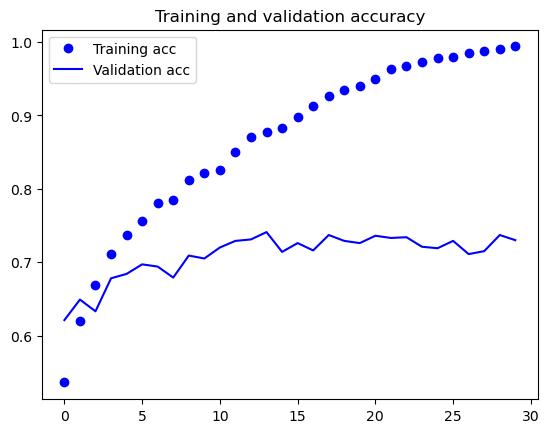

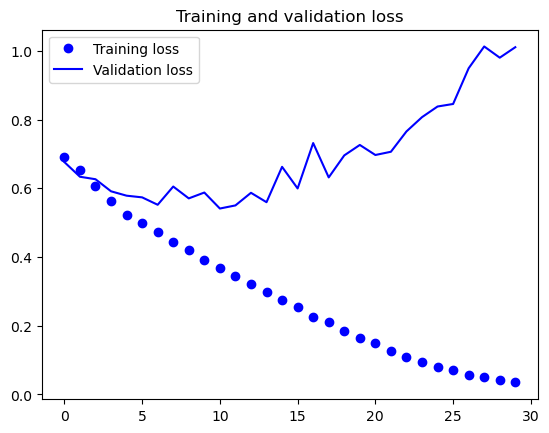

In [19]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True '
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

These plots are characteristic for overfitting and because there are relatively few training samples (total is 2000), this  is going to be the number-one-concern here. 

The training accuracy increases linearly over time, while the validation accuracy stalls at a lower percentage. The validation loss reaches its minimum after only a few epochs and then stalls, while the training loss keeps decreasing linearly until the bitter end :-).

A number of techniques that can help to fight overfitting are known already. These are dropout and L2 regularization. 
However, a new technique you have learned during the lectures is called `data augmentation` and is used almost universally when processing images with deep learning models.

So let us dive into the second part and see what it can do for us. 

## PART II
### building the CNN using data augmentation

<font color="#C70039">General thougts:</font>
Since overfitting is caused by having too few samples to learn from (leaving a model unable to generalize to new data), hypothetically, given infinite data, a model would be exposed to every possible aspect of that data distribution and in consequence it  would never overfit. 

Data augmentation takes this idea and generates more training data from existing training samples, by "augmenting" the samples via a number of random transformations that yield *believable*-looking images. 
The goal is that at training time, the model would never see the exact same picture twice. This helps the model get exposed to more aspects of the data and generalize much better. 

In Keras, configuring a number of random transformations on training images can easily be performed by using the `ImageDataGenerator` instance, that was introduced earlier already. Here an example:

In [20]:
data_aug_gen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

These are just a few of the options available (for more information, see the Keras documentation or external resources such as: https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/ ). Let's look at them in more detail:

* `rotation_range` is a value in degrees (0-180), a range within which to randomly rotate pictures.
* `width_shift` and `height_shift` are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.
* `shear_range` is for randomly applying shearing transformations.
* `zoom_range` is for randomly zooming inside pictures.
* `horizontal_flip` is for randomly flipping half of the images horizontally -- relevant when there are no assumptions of horizontal asymmetry (e.g. real-world pictures).
* `fill_mode` is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.
-----

Let's take a look at the augmented images by picking one and plotting its transformations.

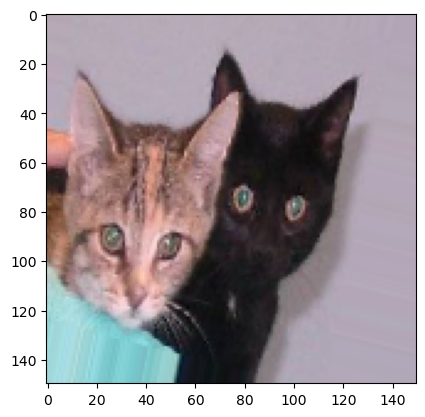

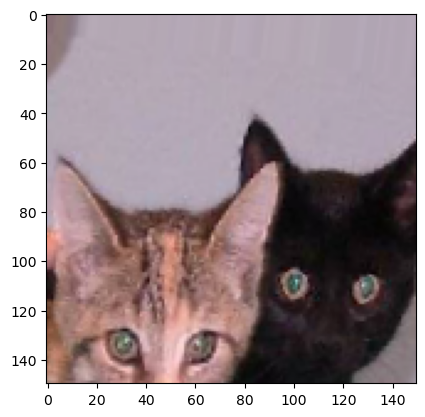

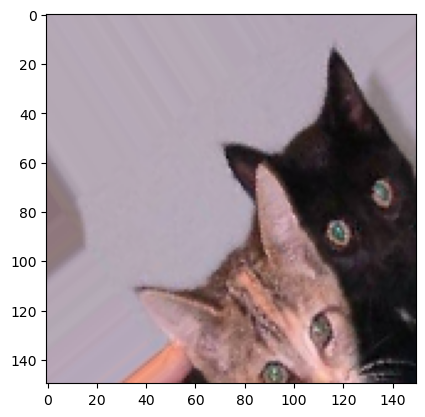

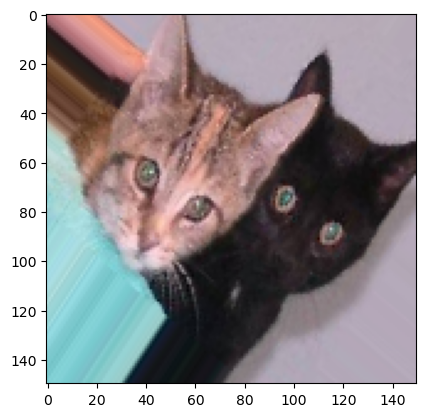

In [24]:
# This module contains some image preprocessing utilities
from tensorflow.keras.preprocessing import image

all_filenames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# Pick one image to "augment": 
'''PLay around and take some others, maybe a dog also.'''
image_picked = all_filenames[85]

# Load that image and resize it
img = image.load_img(image_picked, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3), 
# so all three color channels are separated now.
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command generates batches of randomly transformed images.
# It will loop indefinitely, so make sure to `break` the loop at some point!
i = 0
for batch in data_aug_gen.flow(x, batch_size=1):
    plt.figure(i) # every image has got its own figure
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

# finally show all transformations
plt.show()

If a new network using data augmentation is trained, that network will never see twice the same input. 
However, the inputs that it sees are still heavily intercorrelated (compare the transformed images above), since they come from a small number of original images.  
It is nearly impossible to produce completely new information, only remixing existing information is an alternative. 
As such, this might not be quite enough to completely get rid of overfitting. 
To further fight overfitting, adding a Dropout layer right before the densely-connected classifier seems to be the right choice.

In [26]:
from tensorflow.keras import losses
from tensorflow.keras import metrics

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) # NOTE: dropout is used as well before the FC-layer starts
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

Let's train the network using data augmentation and dropout:

In [27]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since binary_crossentropy loss is used, binary labels are needed
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

print("train_dir=",train_dir)
print("validation_dir=",validation_dir)

history = model.fit(
      train_generator,
      steps_per_epoch=100, 
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
train_dir= ../data/cats_and_dogs_small\train
validation_dir= ../data/cats_and_dogs_small\validation
Epoch 1/100
100/100 [==============================] - 18s 176ms/step - loss: 0.6936 - acc: 0.5090 - val_loss: 0.6904 - val_acc: 0.5260
Epoch 2/100
100/100 [==============================] - 17s 167ms/step - loss: 0.6850 - acc: 0.5645 - val_loss: 0.6648 - val_acc: 0.5980
Epoch 3/100
100/100 [==============================] - 19s 185ms/step - loss: 0.6679 - acc: 0.5795 - val_loss: 0.8711 - val_acc: 0.5000
Epoch 4/100
100/100 [==============================] - 18s 179ms/step - loss: 0.6579 - acc: 0.6020 - val_loss: 0.6380 - val_acc: 0.6220
Epoch 5/100
100/100 [==============================] - 20s 195ms/step - loss: 0.6373 - acc: 0.6265 - val_loss: 0.6313 - val_acc: 0.6410
Epoch 6/100
100/100 [==============================] - 17s 173ms/step - loss: 0.6300 - acc: 0.6545 - val_loss: 0.6097 - val_acc: 0.6620


In [28]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


Let's save the model again. 

In [29]:
model.save('cats_dogs_classification_CNN_with_data_augmentation.h5')

In [30]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

Let's plot the results again using the history object.

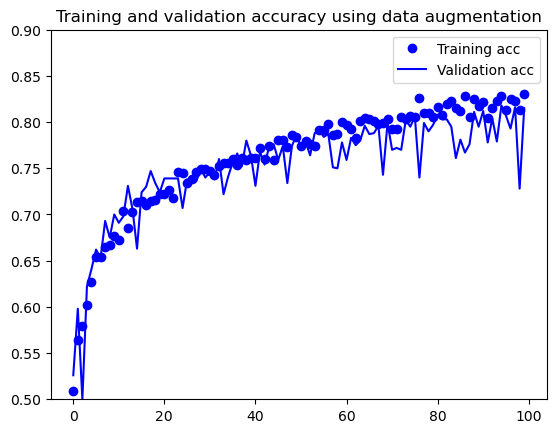

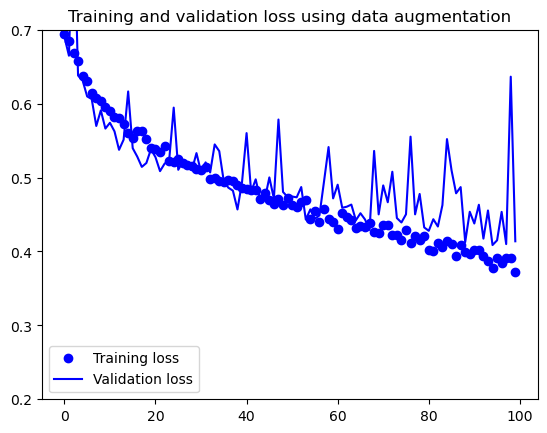

In [31]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.ylim((0.5,0.9))
plt.title('Training and validation accuracy using data augmentation')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.ylim((0.2,0.7))
plt.title('Training and validation loss using data augmentation')
plt.legend()

plt.show()

Thanks to data augmentation and dropout, overfitting is reduced almost completely. 
The training curves are rather closely tracking the validation curves. 
With these methods it was possible to reach a much higer accuracy and this a high relative improvement compared to the non-regularized model.

By leveraging regularization techniques even further and by tuning the network's hyperparameters (such as the number of filters per convolution layer, or the number of layers in the network), it will be possible to get an even better accuracy, likely up to 86-87%. 

For this purpose, you may consider using "weights and biases" (https://wandb.ai/site/sweeps), which allows for automatic, scalable, customizable hyperparameter tuning in a few lines of python code. 

### <font color="#C70039">Include the result table of your test plan here (see task list)</font>

4. given: batch_size=20 and size of training and validation data set.<br>
   Your task: Calculate 
    * steps_per_epoch= 100
    * validation_steps= 50
    
    <br>
    
5. given: batch_size=32 and size of training and validation data set.<br>
    Your task: Calculate
    * steps_per_epoch= 63
    * validation_steps= 32

### task 6

In [40]:
import random

train_size = 4000
val_size = 2000
test_size =  1000

train_start = random.randint(0,12499-train_size)
val_start = random.choice(list(range(0, train_start-val_size)) + list(range(train_start+train_size, 12500)))
test_start1 =  list(range(0, train_start-test_size)) + list(range(train_start+train_size, 12500))
test_start2 = list(range(0, val_start+test_size)) + list(range(train_start+train_size, 12500))
test_start = list(set(test_start1).intersection(test_start2))
test_start = random.choice(test_start)

if os.path.exists(train_cats_dir):
    shutil.rmtree(train_cats_dir)
    shutil.rmtree(train_dogs_dir)
    shutil.rmtree(validation_cats_dir)
    shutil.rmtree(validation_dogs_dir)
    shutil.rmtree(test_cats_dir)
    shutil.rmtree(test_dogs_dir)
# Directory with the training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
if not os.path.exists(train_cats_dir):
    os.mkdir(train_cats_dir)

# Directory with the training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
if not os.path.exists(train_dogs_dir):
    os.mkdir(train_dogs_dir)

# Directory with the validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
if not os.path.exists(validation_cats_dir):
    os.mkdir(validation_cats_dir)

# Directory with the validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if not os.path.exists(validation_dogs_dir):
    os.mkdir(validation_dogs_dir)

# Directory with the test cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
if not os.path.exists(test_cats_dir):
    os.mkdir(test_cats_dir)

# Directory with the test dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
if not os.path.exists(test_dogs_dir):
    os.mkdir(test_dogs_dir)

# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(train_start, train_start+int(train_size/2))]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy NEXT 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(val_start, val_start+int(val_size/2))]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy NEXT 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(test_start, test_start+int(test_size/2))]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(train_start, train_start+int(train_size/2))]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(val_start, val_start+int(val_size/2))]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(test_start, test_start+int(test_size/2))]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [44]:
import pandas as pd

def catdog_model(train_size = train_size, val_size = val_size, test_size = test_size, batch_size_num=20, epoch_num=100, dr=0.5):

        model = models.Sequential()

        model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
        model.add(layers.MaxPooling2D((2, 2)))

        model.add(layers.Conv2D(64, (3, 3), activation='relu'))
        model.add(layers.MaxPooling2D((2, 2)))

        model.add(layers.Conv2D(128, (3, 3), activation='relu'))
        model.add(layers.MaxPooling2D((2, 2)))

        model.add(layers.Conv2D(128, (3, 3), activation='relu'))
        model.add(layers.MaxPooling2D((2, 2)))

        model.add(layers.Flatten())
        model.add(layers.Dropout(dr)) # NOTE: dropout is used as well before the FC-layer starts
        model.add(layers.Dense(512, activation='relu'))
        model.add(layers.Dense(1, activation='sigmoid'))

        model.compile(loss='binary_crossentropy',
                optimizer=optimizers.RMSprop(learning_rate=1e-4),
                metrics=['acc'])

        train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,)

        # Note that the validation data should not be augmented!
        test_datagen = ImageDataGenerator(rescale=1./255)

        train_generator = train_datagen.flow_from_directory(
                # This is the target directory
                train_dir,
                # All images will be resized to 150x150
                target_size=(150, 150),
                batch_size=batch_size_num,
                # Since binary_crossentropy loss is used, binary labels are needed
                class_mode='binary')

        validation_generator = test_datagen.flow_from_directory(
                validation_dir,
                target_size=(150, 150),
                batch_size=20,
                class_mode='binary')

        history = model.fit(
        train_generator,
        steps_per_epoch=train_size/batch_size_num, 
        epochs=epoch_num,
        validation_data=validation_generator,
        validation_steps=val_size/batch_size_num)

        val_acc = max(history.history['val_acc'])

        test_plan_dict = {'method':['binary_classification'], 
        'loss_function':['binary_crossentropy'],
        'optimizer':['rmsprop'],
        'accuracy':[val_acc],
        'batch_size':[batch_size_num],
        'epochs':[epoch_num],
        'dropout_rate':[dr],
        'training_size':[train_size]
        }
        
        df = pd.DataFrame(test_plan_dict)

        return df, model
        

In [52]:
test_plan = pd.DataFrame(columns=['method','loss_function','optimizer','accuracy','batch_size','epochs','dropout_rate','training_size'])

In [53]:
epoch_list = [2,5,10]
batch_size_list = [32,64,128,256,512]
for epoch_num in epoch_list:
    for batch_size_num in batch_size_list:
        tr, model = catdog_model(epoch_num=epoch_num, batch_size_num=batch_size_num)
        test_plan = pd.concat([test_plan, tr]) 

Found 4000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/2
125/125 [==============================] - 38s 298ms/step - loss: 0.6908 - acc: 0.5305 - val_loss: 0.6972 - val_acc: 0.5127
Epoch 2/2
125/125 [==============================] - 36s 286ms/step - loss: 0.6739 - acc: 0.5847 - val_loss: 0.7364 - val_acc: 0.5071
Found 4000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/2
62/62 [==============================] - 36s 566ms/step - loss: 0.6952 - acc: 0.5128 - val_loss: 0.6797 - val_acc: 0.5281
Epoch 2/2
62/62 [==============================] - 35s 556ms/step - loss: 0.6810 - acc: 0.5655 - val_loss: 0.7440 - val_acc: 0.4984
Found 4000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/2
31/31 [==============================] - 35s 1s/step - loss: 0.6955 - acc: 0.5100 - val_loss: 0.6802 - val_acc: 0.5562
Epoch 2/2
31/31 [==============================] - 33s 1s/step - loss: 0.6904 - acc: 0.

In [56]:
test_plan.sort_values(by='accuracy')

,method,loss_function,optimizer,accuracy,batch_size,epochs,dropout_rate,training_size
0,binary_classification,binary_crossentropy,rmsprop,0.512698,32,2,0.5,4000
0,binary_classification,binary_crossentropy,rmsprop,0.518750,256,2,0.5,4000
0,binary_classification,binary_crossentropy,rmsprop,0.528125,64,2,0.5,4000
0,binary_classification,binary_crossentropy,rmsprop,0.556250,128,2,0.5,4000
0,binary_classification,binary_crossentropy,rmsprop,0.600000,256,5,0.5,4000
0,binary_classification,binary_crossentropy,rmsprop,0.612500,512,5,0.5,4000
0,binary_classification,binary_crossentropy,rmsprop,0.635714,32,5,0.5,4000
0,binary_classification,binary_crossentropy,rmsprop,0.643750,64,5,0.5,4000
0,binary_classification,binary_crossentropy,rmsprop,0.643750,128,5,0.5,4000
0,binary_classification,binary_crossentropy,rmsprop,0.662500,512,2,0.5,4000


In [57]:
import gc
gc.collect()

15278

In [ ]:
import random

train_size = 6000
val_size = 3000
test_size =  1000

train_start = random.randint(0,12499-train_size)
val_start = random.choice(list(range(0, train_start-val_size)) + list(range(train_start+train_size, 12499)))
test_start1 =  list(range(0, train_start-test_size)) + list(range(train_start+train_size, 12499))
test_start2 = list(range(0, val_start+test_size)) + list(range(train_start+train_size, 12499))
test_start = list(set(test_start1).intersection(test_start2))
test_start = random.choice(test_start)

if os.path.exists(train_cats_dir):
    shutil.rmtree(train_cats_dir)
    shutil.rmtree(train_dogs_dir)
    shutil.rmtree(validation_cats_dir)
    shutil.rmtree(validation_dogs_dir)
    shutil.rmtree(test_cats_dir)
    shutil.rmtree(test_dogs_dir)
# Directory with the training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
if not os.path.exists(train_cats_dir):
    os.mkdir(train_cats_dir)

# Directory with the training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
if not os.path.exists(train_dogs_dir):
    os.mkdir(train_dogs_dir)

# Directory with the validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
if not os.path.exists(validation_cats_dir):
    os.mkdir(validation_cats_dir)

# Directory with the validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if not os.path.exists(validation_dogs_dir):
    os.mkdir(validation_dogs_dir)

# Directory with the test cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
if not os.path.exists(test_cats_dir):
    os.mkdir(test_cats_dir)

# Directory with the test dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
if not os.path.exists(test_dogs_dir):
    os.mkdir(test_dogs_dir)

# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(train_start, train_start+int(train_size/2))]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy NEXT 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(val_start, val_start+int(val_size/2))]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy NEXT 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(test_start, test_start+int(test_size/2))]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(train_start, train_start+int(train_size/2))]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(val_start, val_start+int(val_size/2))]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(test_start, test_start+int(test_size/2))]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [61]:
tr, model = catdog_model(epoch_num=30)
test_plan = pd.concat([test_plan, tr])

Found 6000 images belonging to 2 classes.
Found 3000 images belonging to 2 classes.
Epoch 1/30
200/200 [==============================] - 63s 309ms/step - loss: 0.6893 - acc: 0.5228 - val_loss: 0.6568 - val_acc: 0.6190
Epoch 2/30
200/200 [==============================] - 48s 239ms/step - loss: 0.6576 - acc: 0.6035 - val_loss: 0.6667 - val_acc: 0.5935
Epoch 3/30
200/200 [==============================] - 37s 187ms/step - loss: 0.6344 - acc: 0.6317 - val_loss: 0.5903 - val_acc: 0.6760
Epoch 4/30
200/200 [==============================] - 42s 207ms/step - loss: 0.6111 - acc: 0.6615 - val_loss: 0.5972 - val_acc: 0.6760
Epoch 5/30
200/200 [==============================] - 35s 173ms/step - loss: 0.6039 - acc: 0.6787 - val_loss: 0.5777 - val_acc: 0.7040
Epoch 6/30
200/200 [==============================] - 40s 200ms/step - loss: 0.5997 - acc: 0.6740 - val_loss: 0.5890 - val_acc: 0.6840
Epoch 7/30
200/200 [==============================] - 35s 175ms/step - loss: 0.5856 - acc: 0.6860 - val_lo

In [62]:
test_plan

,method,loss_function,optimizer,accuracy,batch_size,epochs,dropout_rate,training_size
0,binary_classification,binary_crossentropy,rmsprop,0.512698,32,2,0.5,4000
0,binary_classification,binary_crossentropy,rmsprop,0.528125,64,2,0.5,4000
0,binary_classification,binary_crossentropy,rmsprop,0.556250,128,2,0.5,4000
0,binary_classification,binary_crossentropy,rmsprop,0.518750,256,2,0.5,4000
0,binary_classification,binary_crossentropy,rmsprop,0.662500,512,2,0.5,4000
0,binary_classification,binary_crossentropy,rmsprop,0.635714,32,5,0.5,4000
0,binary_classification,binary_crossentropy,rmsprop,0.643750,64,5,0.5,4000
0,binary_classification,binary_crossentropy,rmsprop,0.643750,128,5,0.5,4000
0,binary_classification,binary_crossentropy,rmsprop,0.600000,256,5,0.5,4000
0,binary_classification,binary_crossentropy,rmsprop,0.612500,512,5,0.5,4000


In [1]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True '
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import random
from tensorflow.keras import losses
from tensorflow.keras import metrics
import pandas as pd

train_size = 6000
val_size = 3000
test_size =  1000


def catdog_model(train_size = train_size, val_size = val_size, test_size = test_size, batch_size_num=20, epoch_num=100, dr=0.5):

        model = models.Sequential()

        model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
        model.add(layers.MaxPooling2D((2, 2)))

        model.add(layers.Conv2D(64, (3, 3), activation='relu'))
        model.add(layers.MaxPooling2D((2, 2)))

        model.add(layers.Conv2D(128, (3, 3), activation='relu'))
        model.add(layers.MaxPooling2D((2, 2)))

        model.add(layers.Conv2D(128, (3, 3), activation='relu'))
        model.add(layers.MaxPooling2D((2, 2)))

        model.add(layers.Flatten())
        model.add(layers.Dropout(dr)) # NOTE: dropout is used as well before the FC-layer starts
        model.add(layers.Dense(512, activation='relu'))
        model.add(layers.Dense(1, activation='sigmoid'))

        model.compile(loss='binary_crossentropy',
                optimizer=optimizers.RMSprop(learning_rate=1e-4),
                metrics=['acc'])

        train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,)

        # Note that the validation data should not be augmented!
        test_datagen = ImageDataGenerator(rescale=1./255)

        train_generator = train_datagen.flow_from_directory(
                # This is the target directory
                train_dir,
                # All images will be resized to 150x150
                target_size=(150, 150),
                batch_size=batch_size_num,
                # Since binary_crossentropy loss is used, binary labels are needed
                class_mode='binary')

        validation_generator = test_datagen.flow_from_directory(
                validation_dir,
                target_size=(150, 150),
                batch_size=20,
                class_mode='binary')

        history = model.fit(
        train_generator,
        steps_per_epoch=train_size/batch_size_num, 
        epochs=epoch_num,
        validation_data=validation_generator,
        validation_steps=val_size/batch_size_num,
        callbacks = [WandbCallback()])

        val_acc = max(history.history['val_acc'])

        test_plan_dict = {'method':['binary_classification'], 
        'loss_function':['binary_crossentropy'],
        'optimizer':['rmsprop'],
        'accuracy':[val_acc],
        'batch_size':[batch_size_num],
        'epochs':[epoch_num],
        'dropout_rate':[dr],
        'training_size':[train_size]
        }
        
        df = pd.DataFrame(test_plan_dict)

        return df, model
        

---------------

In [13]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True '
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import random
from tensorflow.keras import losses
from tensorflow.keras import metrics
import pandas as pd

train_size = 6000
val_size = 3000
test_size =  1000

import wandb
from wandb.keras import WandbMetricsLogger, WandbModelCheckpoint

wandb.login()

True

In [14]:
def build_model(dr = 0.5):
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dropout(dr)) # NOTE: dropout is used as well before the FC-layer starts
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))

    return model

In [15]:
train_size = 6000
val_size = 3000
test_size =  1000

def train_model(model, train_size = train_size, val_size = val_size, test_size = test_size, train_dir=train_dir, validation_dir=validation_dir, batch_size_num=20, epoch_num=100):
    model.compile(loss='binary_crossentropy',
            optimizer=optimizers.RMSprop(learning_rate=1e-4),
            metrics=['acc'])
    
    wandb_callbacks = [
        WandbMetricsLogger(log_freq=10), 
        WandbModelCheckpoint(filepath='cats_dogs_classification_{epoch:02d}')]

    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,)

    # Note that the validation data should not be augmented!
    test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=batch_size_num,
        # Since binary_crossentropy loss is used, binary labels are needed
        class_mode='binary')

    validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=batch_size_num,
        class_mode='binary')


    history = model.fit(
        train_generator,
        steps_per_epoch=train_size/batch_size_num, 
        epochs=epoch_num,
        validation_data=validation_generator,
        validation_steps=val_size/batch_size_num,
        callbacks = wandb_callbacks)
        

In [16]:
sweep_configuration = {
    'method': 'bayes',
    'name': 'sweep',
    'metric': {'goal': 'maximize', 'name': 'val_acc'},
    'parameters': 
    {
        'batch_size': {'values': [8, 16, 32, 64]},
        'epochs': {'values': [5, 10, 15, 30, 50]},
        'dr': {'max': 0.5, 'min': 0.2}
     }
}

In [17]:
def sweep_train(config_defaults=None):
    with wandb.init(config=config_defaults):
        wandb.config.architecture_name = 'cats_dogs_classification'
        wandb.config.dataset_name = 'catdog'

        model = build_model(wandb.config.dr)

        train_model(model, 
            batch_size_num=wandb.config.batch_size,
            epoch_num=wandb.config.epochs
            )

In [18]:
sweep_id = wandb.sweep(sweep_configuration, project='dis21_ex8')

Create sweep with ID: 94sy5wco
Sweep URL: https://wandb.ai/datenkrakewastaken/dis21_ex8/sweeps/94sy5wco


In [19]:
wandb.agent(sweep_id, function=sweep_train, count=20)

wandb: Agent Starting Run: 3m1jsqi3 with config:
wandb: 	batch_size: 16
wandb: 	dr: 0.3975802270384243
wandb: 	epochs: 30
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Found 6000 images belonging to 2 classes.
Found 3000 images belonging to 2 classes.
Epoch 1/30
375/375 [==============================] - ETA: 0s - loss: 0.6881 - acc: 0.5332

INFO:tensorflow:Assets written to: cats_dogs_classification_01\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_01\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_01)... Done. 0.1s


375/375 [==============================] - 56s 148ms/step - loss: 0.6881 - acc: 0.5332 - val_loss: 0.6855 - val_acc: 0.5383
Epoch 2/30
375/375 [==============================] - ETA: 0s - loss: 0.6619 - acc: 0.6042

INFO:tensorflow:Assets written to: cats_dogs_classification_02\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_02\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_02)... Done. 0.1s


375/375 [==============================] - 54s 145ms/step - loss: 0.6619 - acc: 0.6042 - val_loss: 0.6331 - val_acc: 0.6467
Epoch 3/30
375/375 [==============================] - ETA: 0s - loss: 0.6341 - acc: 0.6363

INFO:tensorflow:Assets written to: cats_dogs_classification_03\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_03\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_03)... Done. 0.1s


375/375 [==============================] - 56s 150ms/step - loss: 0.6341 - acc: 0.6363 - val_loss: 0.5891 - val_acc: 0.6840
Epoch 4/30
375/375 [==============================] - ETA: 0s - loss: 0.6144 - acc: 0.6497

INFO:tensorflow:Assets written to: cats_dogs_classification_04\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_04\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_04)... Done. 0.1s


375/375 [==============================] - 50s 134ms/step - loss: 0.6144 - acc: 0.6497 - val_loss: 0.5795 - val_acc: 0.6883
Epoch 5/30
375/375 [==============================] - ETA: 0s - loss: 0.5984 - acc: 0.6718

INFO:tensorflow:Assets written to: cats_dogs_classification_05\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_05\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_05)... Done. 0.1s


375/375 [==============================] - 50s 134ms/step - loss: 0.5984 - acc: 0.6718 - val_loss: 0.5451 - val_acc: 0.7370
Epoch 6/30
375/375 [==============================] - ETA: 0s - loss: 0.5826 - acc: 0.6893

INFO:tensorflow:Assets written to: cats_dogs_classification_06\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_06\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_06)... Done. 0.1s


375/375 [==============================] - 54s 144ms/step - loss: 0.5826 - acc: 0.6893 - val_loss: 0.5390 - val_acc: 0.7383
Epoch 7/30
375/375 [==============================] - ETA: 0s - loss: 0.5739 - acc: 0.7017

INFO:tensorflow:Assets written to: cats_dogs_classification_07\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_07\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_07)... Done. 0.1s


375/375 [==============================] - 55s 146ms/step - loss: 0.5739 - acc: 0.7017 - val_loss: 0.5101 - val_acc: 0.7513
Epoch 8/30
375/375 [==============================] - ETA: 0s - loss: 0.5671 - acc: 0.7033

INFO:tensorflow:Assets written to: cats_dogs_classification_08\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_08\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_08)... Done. 0.1s


375/375 [==============================] - 58s 154ms/step - loss: 0.5671 - acc: 0.7033 - val_loss: 0.5177 - val_acc: 0.7480
Epoch 9/30
375/375 [==============================] - ETA: 0s - loss: 0.5557 - acc: 0.7132

INFO:tensorflow:Assets written to: cats_dogs_classification_09\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_09\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_09)... Done. 0.1s


375/375 [==============================] - 57s 152ms/step - loss: 0.5557 - acc: 0.7132 - val_loss: 0.5017 - val_acc: 0.7650
Epoch 10/30
375/375 [==============================] - ETA: 0s - loss: 0.5569 - acc: 0.7137

INFO:tensorflow:Assets written to: cats_dogs_classification_10\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_10\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_10)... Done. 0.1s


375/375 [==============================] - 55s 148ms/step - loss: 0.5569 - acc: 0.7137 - val_loss: 0.4997 - val_acc: 0.7747
Epoch 11/30
375/375 [==============================] - ETA: 0s - loss: 0.5496 - acc: 0.7248

INFO:tensorflow:Assets written to: cats_dogs_classification_11\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_11\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_11)... Done. 0.1s


375/375 [==============================] - 55s 146ms/step - loss: 0.5496 - acc: 0.7248 - val_loss: 0.5676 - val_acc: 0.7290
Epoch 12/30
375/375 [==============================] - ETA: 0s - loss: 0.5295 - acc: 0.7287

INFO:tensorflow:Assets written to: cats_dogs_classification_12\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_12\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_12)... Done. 0.1s


375/375 [==============================] - 58s 156ms/step - loss: 0.5295 - acc: 0.7287 - val_loss: 0.4900 - val_acc: 0.7700
Epoch 13/30
375/375 [==============================] - ETA: 0s - loss: 0.5277 - acc: 0.7298

INFO:tensorflow:Assets written to: cats_dogs_classification_13\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_13\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_13)... Done. 0.1s


375/375 [==============================] - 63s 167ms/step - loss: 0.5277 - acc: 0.7298 - val_loss: 0.5019 - val_acc: 0.7697
Epoch 14/30
375/375 [==============================] - ETA: 0s - loss: 0.5276 - acc: 0.7378

INFO:tensorflow:Assets written to: cats_dogs_classification_14\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_14\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_14)... Done. 0.1s


375/375 [==============================] - 56s 149ms/step - loss: 0.5276 - acc: 0.7378 - val_loss: 0.4710 - val_acc: 0.7893
Epoch 15/30
375/375 [==============================] - ETA: 0s - loss: 0.5136 - acc: 0.7418

INFO:tensorflow:Assets written to: cats_dogs_classification_15\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_15\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_15)... Done. 0.1s


375/375 [==============================] - 50s 134ms/step - loss: 0.5136 - acc: 0.7418 - val_loss: 0.5680 - val_acc: 0.7430
Epoch 16/30
375/375 [==============================] - ETA: 0s - loss: 0.5166 - acc: 0.7407

INFO:tensorflow:Assets written to: cats_dogs_classification_16\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_16\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_16)... Done. 0.1s


375/375 [==============================] - 54s 145ms/step - loss: 0.5166 - acc: 0.7407 - val_loss: 0.5467 - val_acc: 0.7377
Epoch 17/30
375/375 [==============================] - ETA: 0s - loss: 0.5099 - acc: 0.7552

INFO:tensorflow:Assets written to: cats_dogs_classification_17\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_17\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_17)... Done. 0.1s


375/375 [==============================] - 55s 146ms/step - loss: 0.5099 - acc: 0.7552 - val_loss: 0.4863 - val_acc: 0.7717
Epoch 18/30
375/375 [==============================] - ETA: 0s - loss: 0.5044 - acc: 0.7553

INFO:tensorflow:Assets written to: cats_dogs_classification_18\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_18\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_18)... Done. 0.1s


375/375 [==============================] - 56s 150ms/step - loss: 0.5044 - acc: 0.7553 - val_loss: 0.4814 - val_acc: 0.7860
Epoch 19/30
375/375 [==============================] - ETA: 0s - loss: 0.4992 - acc: 0.7607

INFO:tensorflow:Assets written to: cats_dogs_classification_19\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_19\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_19)... Done. 0.1s


375/375 [==============================] - 53s 142ms/step - loss: 0.4992 - acc: 0.7607 - val_loss: 0.4637 - val_acc: 0.7970
Epoch 20/30
375/375 [==============================] - ETA: 0s - loss: 0.4954 - acc: 0.7612

INFO:tensorflow:Assets written to: cats_dogs_classification_20\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_20\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_20)... Done. 0.1s


375/375 [==============================] - 51s 135ms/step - loss: 0.4954 - acc: 0.7612 - val_loss: 0.5444 - val_acc: 0.7583
Epoch 21/30
375/375 [==============================] - ETA: 0s - loss: 0.4919 - acc: 0.7608

INFO:tensorflow:Assets written to: cats_dogs_classification_21\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_21\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_21)... Done. 0.1s


375/375 [==============================] - 53s 140ms/step - loss: 0.4919 - acc: 0.7608 - val_loss: 0.5535 - val_acc: 0.7713
Epoch 22/30
375/375 [==============================] - ETA: 0s - loss: 0.4894 - acc: 0.7705

INFO:tensorflow:Assets written to: cats_dogs_classification_22\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_22\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_22)... Done. 0.1s


375/375 [==============================] - 50s 134ms/step - loss: 0.4894 - acc: 0.7705 - val_loss: 0.5053 - val_acc: 0.7930
Epoch 23/30
375/375 [==============================] - ETA: 0s - loss: 0.4870 - acc: 0.7735

INFO:tensorflow:Assets written to: cats_dogs_classification_23\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_23\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_23)... Done. 0.1s


375/375 [==============================] - 55s 146ms/step - loss: 0.4870 - acc: 0.7735 - val_loss: 0.4624 - val_acc: 0.7927
Epoch 24/30
375/375 [==============================] - ETA: 0s - loss: 0.4853 - acc: 0.7625

INFO:tensorflow:Assets written to: cats_dogs_classification_24\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_24\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_24)... Done. 0.1s


375/375 [==============================] - 60s 161ms/step - loss: 0.4853 - acc: 0.7625 - val_loss: 0.4479 - val_acc: 0.8073
Epoch 25/30
375/375 [==============================] - ETA: 0s - loss: 0.4797 - acc: 0.7685

INFO:tensorflow:Assets written to: cats_dogs_classification_25\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_25\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_25)... Done. 0.1s


375/375 [==============================] - 59s 157ms/step - loss: 0.4797 - acc: 0.7685 - val_loss: 0.4391 - val_acc: 0.8097
Epoch 26/30
375/375 [==============================] - ETA: 0s - loss: 0.4690 - acc: 0.7790

INFO:tensorflow:Assets written to: cats_dogs_classification_26\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_26\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_26)... Done. 0.1s


375/375 [==============================] - 59s 157ms/step - loss: 0.4690 - acc: 0.7790 - val_loss: 0.4549 - val_acc: 0.8090
Epoch 27/30
375/375 [==============================] - ETA: 0s - loss: 0.4697 - acc: 0.7732

INFO:tensorflow:Assets written to: cats_dogs_classification_27\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_27\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_27)... Done. 0.1s


375/375 [==============================] - 60s 159ms/step - loss: 0.4697 - acc: 0.7732 - val_loss: 0.4763 - val_acc: 0.7970
Epoch 28/30
375/375 [==============================] - ETA: 0s - loss: 0.4607 - acc: 0.7838

INFO:tensorflow:Assets written to: cats_dogs_classification_28\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_28\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_28)... Done. 0.1s


375/375 [==============================] - 60s 159ms/step - loss: 0.4607 - acc: 0.7838 - val_loss: 0.4268 - val_acc: 0.8137
Epoch 29/30
375/375 [==============================] - ETA: 0s - loss: 0.4528 - acc: 0.7918

INFO:tensorflow:Assets written to: cats_dogs_classification_29\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_29\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_29)... Done. 0.1s


375/375 [==============================] - 54s 145ms/step - loss: 0.4528 - acc: 0.7918 - val_loss: 0.5487 - val_acc: 0.7730
Epoch 30/30
375/375 [==============================] - ETA: 0s - loss: 0.4570 - acc: 0.7880

INFO:tensorflow:Assets written to: cats_dogs_classification_30\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_30\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_30)... Done. 0.1s


375/375 [==============================] - 52s 138ms/step - loss: 0.4570 - acc: 0.7880 - val_loss: 0.5175 - val_acc: 0.7657


batch/acc,▁▁▄▄▄▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇█▇▇▇▇██▇█▇▇█████
batch/batch_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
batch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
batch/loss,██▇▆▆▆▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▃▃▂▂▂▂▂▂▂▂▂▁▂▂▂▁▁▁▁
epoch/acc,▁▃▄▄▅▅▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇█▇▇█▇███
epoch/epoch,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇███
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▇▆▆▅▅▅▄▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▁▂▁▁▁
epoch/val_acc,▁▄▅▅▆▆▆▆▇▇▆▇▇▇▆▆▇▇█▇▇▇▇█████▇▇
epoch/val_loss,█▇▅▅▄▄▃▃▃▃▅▃▃▂▅▄▃▂▂▄▄▃▂▂▁▂▂▁▄▃
batch/acc,0.78875


wandb: Agent Starting Run: kziuj6eo with config:
wandb: 	batch_size: 32
wandb: 	dr: 0.23897899870487893
wandb: 	epochs: 30
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Found 6000 images belonging to 2 classes.
Found 3000 images belonging to 2 classes.
Epoch 1/30
188/187 [==============================] - ETA: 0s - loss: 0.6875 - acc: 0.5348

INFO:tensorflow:Assets written to: cats_dogs_classification_01\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_01\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_01)... Done. 0.1s


187/187 [==============================] - 52s 276ms/step - loss: 0.6875 - acc: 0.5348 - val_loss: 0.6619 - val_acc: 0.5997
Epoch 2/30
188/187 [==============================] - ETA: 0s - loss: 0.6586 - acc: 0.6028

INFO:tensorflow:Assets written to: cats_dogs_classification_02\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_02\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_02)... Done. 0.1s


187/187 [==============================] - 50s 268ms/step - loss: 0.6586 - acc: 0.6028 - val_loss: 0.6240 - val_acc: 0.6407
Epoch 3/30
188/187 [==============================] - ETA: 0s - loss: 0.6354 - acc: 0.6313

INFO:tensorflow:Assets written to: cats_dogs_classification_03\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_03\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_03)... Done. 0.1s


187/187 [==============================] - 51s 271ms/step - loss: 0.6354 - acc: 0.6313 - val_loss: 0.5832 - val_acc: 0.6913
Epoch 4/30
188/187 [==============================] - ETA: 0s - loss: 0.6169 - acc: 0.6508

INFO:tensorflow:Assets written to: cats_dogs_classification_04\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_04\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_04)... Done. 0.1s


187/187 [==============================] - 52s 276ms/step - loss: 0.6169 - acc: 0.6508 - val_loss: 0.5913 - val_acc: 0.6717
Epoch 5/30
188/187 [==============================] - ETA: 0s - loss: 0.5932 - acc: 0.6757

INFO:tensorflow:Assets written to: cats_dogs_classification_05\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_05\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_05)... Done. 0.1s


187/187 [==============================] - 54s 289ms/step - loss: 0.5932 - acc: 0.6757 - val_loss: 0.5836 - val_acc: 0.6940
Epoch 6/30
188/187 [==============================] - ETA: 0s - loss: 0.5878 - acc: 0.6828

INFO:tensorflow:Assets written to: cats_dogs_classification_06\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_06\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_06)... Done. 0.1s


187/187 [==============================] - 50s 266ms/step - loss: 0.5878 - acc: 0.6828 - val_loss: 0.5500 - val_acc: 0.7213
Epoch 7/30
188/187 [==============================] - ETA: 0s - loss: 0.5779 - acc: 0.6958

INFO:tensorflow:Assets written to: cats_dogs_classification_07\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_07\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_07)... Done. 0.1s


187/187 [==============================] - 54s 286ms/step - loss: 0.5779 - acc: 0.6958 - val_loss: 0.5517 - val_acc: 0.7223
Epoch 8/30
188/187 [==============================] - ETA: 0s - loss: 0.5716 - acc: 0.6993

INFO:tensorflow:Assets written to: cats_dogs_classification_08\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_08\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_08)... Done. 0.1s


187/187 [==============================] - 57s 305ms/step - loss: 0.5716 - acc: 0.6993 - val_loss: 0.5356 - val_acc: 0.7357
Epoch 9/30
188/187 [==============================] - ETA: 0s - loss: 0.5671 - acc: 0.7047

INFO:tensorflow:Assets written to: cats_dogs_classification_09\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_09\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_09)... Done. 0.4s


187/187 [==============================] - 58s 310ms/step - loss: 0.5671 - acc: 0.7047 - val_loss: 0.5278 - val_acc: 0.7533
Epoch 10/30
188/187 [==============================] - ETA: 0s - loss: 0.5511 - acc: 0.7272

INFO:tensorflow:Assets written to: cats_dogs_classification_10\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_10\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_10)... Done. 0.1s


187/187 [==============================] - 57s 305ms/step - loss: 0.5511 - acc: 0.7272 - val_loss: 0.5242 - val_acc: 0.7457
Epoch 11/30
188/187 [==============================] - ETA: 0s - loss: 0.5408 - acc: 0.7237

INFO:tensorflow:Assets written to: cats_dogs_classification_11\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_11\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_11)... Done. 0.1s


187/187 [==============================] - 58s 309ms/step - loss: 0.5408 - acc: 0.7237 - val_loss: 0.5820 - val_acc: 0.6960
Epoch 12/30
188/187 [==============================] - ETA: 0s - loss: 0.5403 - acc: 0.7262

INFO:tensorflow:Assets written to: cats_dogs_classification_12\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_12\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_12)... Done. 0.1s


187/187 [==============================] - 60s 320ms/step - loss: 0.5403 - acc: 0.7262 - val_loss: 0.5064 - val_acc: 0.7600
Epoch 13/30
188/187 [==============================] - ETA: 0s - loss: 0.5346 - acc: 0.7277

INFO:tensorflow:Assets written to: cats_dogs_classification_13\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_13\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_13)... Done. 0.1s


187/187 [==============================] - 58s 312ms/step - loss: 0.5346 - acc: 0.7277 - val_loss: 0.5038 - val_acc: 0.7623
Epoch 14/30
188/187 [==============================] - ETA: 0s - loss: 0.5230 - acc: 0.7383

INFO:tensorflow:Assets written to: cats_dogs_classification_14\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_14\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_14)... Done. 0.1s


187/187 [==============================] - 52s 279ms/step - loss: 0.5230 - acc: 0.7383 - val_loss: 0.4867 - val_acc: 0.7677
Epoch 15/30
188/187 [==============================] - ETA: 0s - loss: 0.5238 - acc: 0.7382

INFO:tensorflow:Assets written to: cats_dogs_classification_15\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_15\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_15)... Done. 0.1s


187/187 [==============================] - 51s 272ms/step - loss: 0.5238 - acc: 0.7382 - val_loss: 0.5162 - val_acc: 0.7613
Epoch 16/30
188/187 [==============================] - ETA: 0s - loss: 0.5148 - acc: 0.7422

INFO:tensorflow:Assets written to: cats_dogs_classification_16\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_16\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_16)... Done. 0.1s


187/187 [==============================] - 57s 304ms/step - loss: 0.5148 - acc: 0.7422 - val_loss: 0.5197 - val_acc: 0.7550
Epoch 17/30
188/187 [==============================] - ETA: 0s - loss: 0.5098 - acc: 0.7488

INFO:tensorflow:Assets written to: cats_dogs_classification_17\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_17\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_17)... Done. 0.1s


187/187 [==============================] - 57s 302ms/step - loss: 0.5098 - acc: 0.7488 - val_loss: 0.5071 - val_acc: 0.7533
Epoch 18/30
188/187 [==============================] - ETA: 0s - loss: 0.5061 - acc: 0.7448

INFO:tensorflow:Assets written to: cats_dogs_classification_18\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_18\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_18)... Done. 0.1s


187/187 [==============================] - 63s 336ms/step - loss: 0.5061 - acc: 0.7448 - val_loss: 0.4890 - val_acc: 0.7723
Epoch 19/30
188/187 [==============================] - ETA: 0s - loss: 0.5022 - acc: 0.7547

INFO:tensorflow:Assets written to: cats_dogs_classification_19\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_19\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_19)... Done. 0.1s


187/187 [==============================] - 59s 313ms/step - loss: 0.5022 - acc: 0.7547 - val_loss: 0.4544 - val_acc: 0.7973
Epoch 20/30
188/187 [==============================] - ETA: 0s - loss: 0.4994 - acc: 0.7543

INFO:tensorflow:Assets written to: cats_dogs_classification_20\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_20\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_20)... Done. 0.1s


187/187 [==============================] - 53s 281ms/step - loss: 0.4994 - acc: 0.7543 - val_loss: 0.4676 - val_acc: 0.7813
Epoch 21/30
188/187 [==============================] - ETA: 0s - loss: 0.4936 - acc: 0.7613

INFO:tensorflow:Assets written to: cats_dogs_classification_21\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_21\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_21)... Done. 0.1s


187/187 [==============================] - 53s 282ms/step - loss: 0.4936 - acc: 0.7613 - val_loss: 0.4597 - val_acc: 0.7940
Epoch 22/30
188/187 [==============================] - ETA: 0s - loss: 0.4960 - acc: 0.7590

INFO:tensorflow:Assets written to: cats_dogs_classification_22\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_22\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_22)... Done. 0.1s


187/187 [==============================] - 52s 276ms/step - loss: 0.4960 - acc: 0.7590 - val_loss: 0.4824 - val_acc: 0.7810
Epoch 23/30
188/187 [==============================] - ETA: 0s - loss: 0.4854 - acc: 0.7705

INFO:tensorflow:Assets written to: cats_dogs_classification_23\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_23\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_23)... Done. 0.1s


187/187 [==============================] - 56s 300ms/step - loss: 0.4854 - acc: 0.7705 - val_loss: 0.4785 - val_acc: 0.7873
Epoch 24/30
188/187 [==============================] - ETA: 0s - loss: 0.4847 - acc: 0.7652

INFO:tensorflow:Assets written to: cats_dogs_classification_24\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_24\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_24)... Done. 0.1s


187/187 [==============================] - 61s 325ms/step - loss: 0.4847 - acc: 0.7652 - val_loss: 0.4474 - val_acc: 0.7957
Epoch 25/30
188/187 [==============================] - ETA: 0s - loss: 0.4815 - acc: 0.7618

INFO:tensorflow:Assets written to: cats_dogs_classification_25\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_25\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_25)... Done. 0.1s


187/187 [==============================] - 63s 334ms/step - loss: 0.4815 - acc: 0.7618 - val_loss: 0.4412 - val_acc: 0.7977
Epoch 26/30
188/187 [==============================] - ETA: 0s - loss: 0.4745 - acc: 0.7677

INFO:tensorflow:Assets written to: cats_dogs_classification_26\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_26\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_26)... Done. 0.1s


187/187 [==============================] - 64s 339ms/step - loss: 0.4745 - acc: 0.7677 - val_loss: 0.4670 - val_acc: 0.7910
Epoch 27/30
188/187 [==============================] - ETA: 0s - loss: 0.4680 - acc: 0.7722

INFO:tensorflow:Assets written to: cats_dogs_classification_27\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_27\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_27)... Done. 0.1s


187/187 [==============================] - 59s 316ms/step - loss: 0.4680 - acc: 0.7722 - val_loss: 0.4986 - val_acc: 0.7720
Epoch 28/30
188/187 [==============================] - ETA: 0s - loss: 0.4668 - acc: 0.7722

INFO:tensorflow:Assets written to: cats_dogs_classification_28\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_28\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_28)... Done. 0.1s


187/187 [==============================] - 62s 330ms/step - loss: 0.4668 - acc: 0.7722 - val_loss: 0.4496 - val_acc: 0.7973
Epoch 29/30
188/187 [==============================] - ETA: 0s - loss: 0.4549 - acc: 0.7848

INFO:tensorflow:Assets written to: cats_dogs_classification_29\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_29\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_29)... Done. 0.1s


187/187 [==============================] - 62s 332ms/step - loss: 0.4549 - acc: 0.7848 - val_loss: 0.4470 - val_acc: 0.8057
Epoch 30/30
188/187 [==============================] - ETA: 0s - loss: 0.4572 - acc: 0.7763

INFO:tensorflow:Assets written to: cats_dogs_classification_30\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_30\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_30)... Done. 0.1s


187/187 [==============================] - 52s 277ms/step - loss: 0.4572 - acc: 0.7763 - val_loss: 0.4393 - val_acc: 0.8053


batch/acc,▁▁▃▄▄▄▅▅▅▆▆▆▆▆▆▆▇▇▇▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇█▆▇
batch/batch_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
batch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
batch/loss,██▇▇▆▆▆▅▅▄▅▅▄▄▄▄▃▄▃▄▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▁▁▂
epoch/acc,▁▃▄▄▅▅▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇█▇▇█████
epoch/epoch,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇███
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▇▆▆▅▅▅▅▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁
epoch/val_acc,▁▂▄▃▄▅▅▆▆▆▄▆▇▇▆▆▆▇█▇█▇▇███▇███
epoch/val_loss,█▇▆▆▆▄▅▄▄▄▅▃▃▂▃▄▃▃▁▂▂▂▂▁▁▂▃▁▁▁
batch/acc,0.77684


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: ci14le9d with config:
wandb: 	batch_size: 64
wandb: 	dr: 0.2996070263555083
wandb: 	epochs: 15
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Found 6000 images belonging to 2 classes.
Found 3000 images belonging to 2 classes.
Epoch 1/15
94/93 [==============================] - ETA: 0s - loss: 0.6906 - acc: 0.5282

INFO:tensorflow:Assets written to: cats_dogs_classification_01\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_01\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_01)... Done. 0.1s


93/93 [==============================] - 53s 561ms/step - loss: 0.6906 - acc: 0.5282 - val_loss: 0.6787 - val_acc: 0.5957
Epoch 2/15
94/93 [==============================] - ETA: 0s - loss: 0.6720 - acc: 0.5758

INFO:tensorflow:Assets written to: cats_dogs_classification_02\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_02\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_02)... Done. 0.1s


93/93 [==============================] - 57s 608ms/step - loss: 0.6720 - acc: 0.5758 - val_loss: 0.6714 - val_acc: 0.5740
Epoch 3/15
94/93 [==============================] - ETA: 0s - loss: 0.6491 - acc: 0.6172

INFO:tensorflow:Assets written to: cats_dogs_classification_03\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_03\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_03)... Done. 0.1s


93/93 [==============================] - 56s 597ms/step - loss: 0.6491 - acc: 0.6172 - val_loss: 0.6287 - val_acc: 0.6340
Epoch 4/15
94/93 [==============================] - ETA: 0s - loss: 0.6383 - acc: 0.6297

INFO:tensorflow:Assets written to: cats_dogs_classification_04\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_04\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_04)... Done. 0.1s


93/93 [==============================] - 55s 588ms/step - loss: 0.6383 - acc: 0.6297 - val_loss: 0.6009 - val_acc: 0.6787
Epoch 5/15
94/93 [==============================] - ETA: 0s - loss: 0.6203 - acc: 0.6462

INFO:tensorflow:Assets written to: cats_dogs_classification_05\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_05\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_05)... Done. 0.1s


93/93 [==============================] - 53s 569ms/step - loss: 0.6203 - acc: 0.6462 - val_loss: 0.6007 - val_acc: 0.6677
Epoch 6/15
94/93 [==============================] - ETA: 0s - loss: 0.6088 - acc: 0.6658

INFO:tensorflow:Assets written to: cats_dogs_classification_06\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_06\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_06)... Done. 0.1s


93/93 [==============================] - 59s 625ms/step - loss: 0.6088 - acc: 0.6658 - val_loss: 0.5944 - val_acc: 0.6630
Epoch 7/15
94/93 [==============================] - ETA: 0s - loss: 0.6024 - acc: 0.6693

INFO:tensorflow:Assets written to: cats_dogs_classification_07\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_07\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_07)... Done. 0.1s


93/93 [==============================] - 63s 675ms/step - loss: 0.6024 - acc: 0.6693 - val_loss: 0.6271 - val_acc: 0.6457
Epoch 8/15
94/93 [==============================] - ETA: 0s - loss: 0.6000 - acc: 0.6785

INFO:tensorflow:Assets written to: cats_dogs_classification_08\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_08\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_08)... Done. 0.1s


93/93 [==============================] - 61s 654ms/step - loss: 0.6000 - acc: 0.6785 - val_loss: 0.5610 - val_acc: 0.7183
Epoch 9/15
94/93 [==============================] - ETA: 0s - loss: 0.5837 - acc: 0.6927

INFO:tensorflow:Assets written to: cats_dogs_classification_09\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_09\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_09)... Done. 0.1s


93/93 [==============================] - 62s 664ms/step - loss: 0.5837 - acc: 0.6927 - val_loss: 0.5628 - val_acc: 0.7127
Epoch 10/15
94/93 [==============================] - ETA: 0s - loss: 0.5738 - acc: 0.6945

INFO:tensorflow:Assets written to: cats_dogs_classification_10\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_10\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_10)... Done. 0.1s


93/93 [==============================] - 63s 675ms/step - loss: 0.5738 - acc: 0.6945 - val_loss: 0.5753 - val_acc: 0.7053
Epoch 11/15
94/93 [==============================] - ETA: 0s - loss: 0.5720 - acc: 0.7038

INFO:tensorflow:Assets written to: cats_dogs_classification_11\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_11\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_11)... Done. 0.1s


93/93 [==============================] - 62s 665ms/step - loss: 0.5720 - acc: 0.7038 - val_loss: 0.5707 - val_acc: 0.7013
Epoch 12/15
94/93 [==============================] - ETA: 0s - loss: 0.5651 - acc: 0.7062

INFO:tensorflow:Assets written to: cats_dogs_classification_12\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_12\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_12)... Done. 0.1s


93/93 [==============================] - 60s 639ms/step - loss: 0.5651 - acc: 0.7062 - val_loss: 0.5337 - val_acc: 0.7243
Epoch 13/15
94/93 [==============================] - ETA: 0s - loss: 0.5532 - acc: 0.7153

INFO:tensorflow:Assets written to: cats_dogs_classification_13\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_13\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_13)... Done. 0.1s


93/93 [==============================] - 55s 585ms/step - loss: 0.5532 - acc: 0.7153 - val_loss: 0.5471 - val_acc: 0.7130
Epoch 14/15
94/93 [==============================] - ETA: 0s - loss: 0.5519 - acc: 0.7135

INFO:tensorflow:Assets written to: cats_dogs_classification_14\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_14\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_14)... Done. 0.1s


93/93 [==============================] - 54s 577ms/step - loss: 0.5519 - acc: 0.7135 - val_loss: 0.5709 - val_acc: 0.7127
Epoch 15/15
94/93 [==============================] - ETA: 0s - loss: 0.5473 - acc: 0.7170

INFO:tensorflow:Assets written to: cats_dogs_classification_15\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_15\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_15)... Done. 0.1s


93/93 [==============================] - 54s 572ms/step - loss: 0.5473 - acc: 0.7170 - val_loss: 0.5503 - val_acc: 0.7177


batch/acc,▂▁▁▂▃▃▄▄▅▅▅▅▅▅▆▆▇▆▆▇▇▇▇▇▇▇▇▇▇▇▇█████████
batch/batch_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
batch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
batch/loss,████▇▇▆▆▆▅▅▅▅▄▄▄▃▃▄▄▄▃▃▃▂▃▂▃▂▃▃▂▂▁▁▁▁▁▁▁
epoch/acc,▁▃▄▅▅▆▆▇▇▇█████
epoch/epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▇▆▅▅▄▄▄▃▂▂▂▁▁▁
epoch/val_acc,▂▁▄▆▅▅▄█▇▇▇█▇▇█
epoch/val_loss,██▆▄▄▄▆▂▂▃▃▁▂▃▂
batch/acc,0.71574


wandb: Agent Starting Run: 9hnlipq1 with config:
wandb: 	batch_size: 8
wandb: 	dr: 0.34460052330456137
wandb: 	epochs: 30
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Found 6000 images belonging to 2 classes.
Found 3000 images belonging to 2 classes.
Epoch 1/30
750/750 [==============================] - ETA: 0s - loss: 0.6836 - acc: 0.5472

INFO:tensorflow:Assets written to: cats_dogs_classification_01\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_01\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_01)... Done. 0.1s


750/750 [==============================] - 66s 87ms/step - loss: 0.6836 - acc: 0.5472 - val_loss: 0.6761 - val_acc: 0.5590
Epoch 2/30
750/750 [==============================] - ETA: 0s - loss: 0.6447 - acc: 0.6180

INFO:tensorflow:Assets written to: cats_dogs_classification_02\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_02\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_02)... Done. 0.1s


750/750 [==============================] - 83s 110ms/step - loss: 0.6447 - acc: 0.6180 - val_loss: 0.7431 - val_acc: 0.5957
Epoch 3/30
750/750 [==============================] - ETA: 0s - loss: 0.6193 - acc: 0.6533

INFO:tensorflow:Assets written to: cats_dogs_classification_03\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_03\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_03)... Done. 0.1s


750/750 [==============================] - 60s 80ms/step - loss: 0.6193 - acc: 0.6533 - val_loss: 0.5677 - val_acc: 0.7113
Epoch 4/30
750/750 [==============================] - ETA: 0s - loss: 0.5951 - acc: 0.6792

INFO:tensorflow:Assets written to: cats_dogs_classification_04\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_04\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_04)... Done. 0.1s


750/750 [==============================] - 63s 84ms/step - loss: 0.5951 - acc: 0.6792 - val_loss: 0.5760 - val_acc: 0.7007
Epoch 5/30
750/750 [==============================] - ETA: 0s - loss: 0.5934 - acc: 0.6798

INFO:tensorflow:Assets written to: cats_dogs_classification_05\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_05\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_05)... Done. 0.1s


750/750 [==============================] - 66s 88ms/step - loss: 0.5934 - acc: 0.6798 - val_loss: 0.5942 - val_acc: 0.6620
Epoch 6/30
750/750 [==============================] - ETA: 0s - loss: 0.5820 - acc: 0.6958

INFO:tensorflow:Assets written to: cats_dogs_classification_06\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_06\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_06)... Done. 0.1s


750/750 [==============================] - 67s 89ms/step - loss: 0.5820 - acc: 0.6958 - val_loss: 0.5603 - val_acc: 0.7263
Epoch 7/30
750/750 [==============================] - ETA: 0s - loss: 0.5705 - acc: 0.7035

INFO:tensorflow:Assets written to: cats_dogs_classification_07\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_07\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_07)... Done. 0.1s


750/750 [==============================] - 67s 90ms/step - loss: 0.5705 - acc: 0.7035 - val_loss: 0.5774 - val_acc: 0.7157
Epoch 8/30
750/750 [==============================] - ETA: 0s - loss: 0.5671 - acc: 0.7085

INFO:tensorflow:Assets written to: cats_dogs_classification_08\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_08\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_08)... Done. 0.1s


750/750 [==============================] - 70s 93ms/step - loss: 0.5671 - acc: 0.7085 - val_loss: 0.5308 - val_acc: 0.7497
Epoch 9/30
750/750 [==============================] - ETA: 0s - loss: 0.5499 - acc: 0.7247

INFO:tensorflow:Assets written to: cats_dogs_classification_09\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_09\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_09)... Done. 0.1s


750/750 [==============================] - 67s 90ms/step - loss: 0.5499 - acc: 0.7247 - val_loss: 0.5333 - val_acc: 0.7607
Epoch 10/30
750/750 [==============================] - ETA: 0s - loss: 0.5510 - acc: 0.7257

INFO:tensorflow:Assets written to: cats_dogs_classification_10\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_10\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_10)... Done. 0.1s


750/750 [==============================] - 63s 84ms/step - loss: 0.5510 - acc: 0.7257 - val_loss: 0.6881 - val_acc: 0.7030
Epoch 11/30
750/750 [==============================] - ETA: 0s - loss: 0.5337 - acc: 0.7355

INFO:tensorflow:Assets written to: cats_dogs_classification_11\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_11\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_11)... Done. 0.1s


750/750 [==============================] - 58s 77ms/step - loss: 0.5337 - acc: 0.7355 - val_loss: 0.5038 - val_acc: 0.7803
Epoch 12/30
750/750 [==============================] - ETA: 0s - loss: 0.5303 - acc: 0.7407

INFO:tensorflow:Assets written to: cats_dogs_classification_12\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_12\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_12)... Done. 0.1s


750/750 [==============================] - 60s 81ms/step - loss: 0.5303 - acc: 0.7407 - val_loss: 0.4954 - val_acc: 0.7803
Epoch 13/30
750/750 [==============================] - ETA: 0s - loss: 0.5310 - acc: 0.7405

INFO:tensorflow:Assets written to: cats_dogs_classification_13\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_13\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_13)... Done. 0.1s


750/750 [==============================] - 60s 79ms/step - loss: 0.5310 - acc: 0.7405 - val_loss: 0.5081 - val_acc: 0.7760
Epoch 14/30
750/750 [==============================] - ETA: 0s - loss: 0.5212 - acc: 0.7457

INFO:tensorflow:Assets written to: cats_dogs_classification_14\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_14\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_14)... Done. 0.1s


750/750 [==============================] - 62s 83ms/step - loss: 0.5212 - acc: 0.7457 - val_loss: 0.4939 - val_acc: 0.7907
Epoch 15/30
750/750 [==============================] - ETA: 0s - loss: 0.5111 - acc: 0.7532

INFO:tensorflow:Assets written to: cats_dogs_classification_15\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_15\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_15)... Done. 0.1s


750/750 [==============================] - 65s 87ms/step - loss: 0.5111 - acc: 0.7532 - val_loss: 0.5385 - val_acc: 0.7757
Epoch 16/30
750/750 [==============================] - ETA: 0s - loss: 0.5126 - acc: 0.7552

INFO:tensorflow:Assets written to: cats_dogs_classification_16\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_16\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_16)... Done. 0.1s


750/750 [==============================] - 62s 82ms/step - loss: 0.5126 - acc: 0.7552 - val_loss: 0.4831 - val_acc: 0.7847
Epoch 17/30
750/750 [==============================] - ETA: 0s - loss: 0.4972 - acc: 0.7607

INFO:tensorflow:Assets written to: cats_dogs_classification_17\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_17\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_17)... Done. 0.1s


750/750 [==============================] - 57s 76ms/step - loss: 0.4972 - acc: 0.7607 - val_loss: 0.4783 - val_acc: 0.7953
Epoch 18/30
750/750 [==============================] - ETA: 0s - loss: 0.4959 - acc: 0.7643

INFO:tensorflow:Assets written to: cats_dogs_classification_18\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_18\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_18)... Done. 0.1s


750/750 [==============================] - 56s 75ms/step - loss: 0.4959 - acc: 0.7643 - val_loss: 0.5022 - val_acc: 0.7933
Epoch 19/30
750/750 [==============================] - ETA: 0s - loss: 0.4960 - acc: 0.7653

INFO:tensorflow:Assets written to: cats_dogs_classification_19\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_19\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_19)... Done. 0.1s


750/750 [==============================] - 56s 75ms/step - loss: 0.4960 - acc: 0.7653 - val_loss: 0.5074 - val_acc: 0.7917
Epoch 20/30
750/750 [==============================] - ETA: 0s - loss: 0.4794 - acc: 0.7753

INFO:tensorflow:Assets written to: cats_dogs_classification_20\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_20\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_20)... Done. 0.1s


750/750 [==============================] - 61s 82ms/step - loss: 0.4794 - acc: 0.7753 - val_loss: 0.6257 - val_acc: 0.7680
Epoch 21/30
750/750 [==============================] - ETA: 0s - loss: 0.4886 - acc: 0.7675

INFO:tensorflow:Assets written to: cats_dogs_classification_21\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_21\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_21)... Done. 0.1s


750/750 [==============================] - 65s 86ms/step - loss: 0.4886 - acc: 0.7675 - val_loss: 0.4474 - val_acc: 0.8117
Epoch 22/30
750/750 [==============================] - ETA: 0s - loss: 0.4804 - acc: 0.7712

INFO:tensorflow:Assets written to: cats_dogs_classification_22\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_22\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_22)... Done. 0.1s


750/750 [==============================] - 65s 87ms/step - loss: 0.4804 - acc: 0.7712 - val_loss: 0.4814 - val_acc: 0.7930
Epoch 23/30
750/750 [==============================] - ETA: 0s - loss: 0.4696 - acc: 0.7795

INFO:tensorflow:Assets written to: cats_dogs_classification_23\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_23\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_23)... Done. 0.1s


750/750 [==============================] - 65s 87ms/step - loss: 0.4696 - acc: 0.7795 - val_loss: 0.4793 - val_acc: 0.8170
Epoch 24/30
750/750 [==============================] - ETA: 0s - loss: 0.4744 - acc: 0.7743

INFO:tensorflow:Assets written to: cats_dogs_classification_24\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_24\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_24)... Done. 0.1s


750/750 [==============================] - 65s 87ms/step - loss: 0.4744 - acc: 0.7743 - val_loss: 0.4761 - val_acc: 0.8050
Epoch 25/30
750/750 [==============================] - ETA: 0s - loss: 0.4768 - acc: 0.7713

INFO:tensorflow:Assets written to: cats_dogs_classification_25\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_25\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_25)... Done. 0.1s


750/750 [==============================] - 66s 88ms/step - loss: 0.4768 - acc: 0.7713 - val_loss: 0.4882 - val_acc: 0.8033
Epoch 26/30
750/750 [==============================] - ETA: 0s - loss: 0.4725 - acc: 0.7815

INFO:tensorflow:Assets written to: cats_dogs_classification_26\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_26\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_26)... Done. 0.1s


750/750 [==============================] - 62s 83ms/step - loss: 0.4725 - acc: 0.7815 - val_loss: 0.5269 - val_acc: 0.8040
Epoch 27/30
750/750 [==============================] - ETA: 0s - loss: 0.4525 - acc: 0.7902

INFO:tensorflow:Assets written to: cats_dogs_classification_27\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_27\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_27)... Done. 0.1s


750/750 [==============================] - 57s 77ms/step - loss: 0.4525 - acc: 0.7902 - val_loss: 1.0010 - val_acc: 0.7423
Epoch 28/30
750/750 [==============================] - ETA: 0s - loss: 0.4534 - acc: 0.7897

INFO:tensorflow:Assets written to: cats_dogs_classification_28\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_28\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_28)... Done. 0.1s


750/750 [==============================] - 57s 76ms/step - loss: 0.4534 - acc: 0.7897 - val_loss: 0.5507 - val_acc: 0.7713
Epoch 29/30
750/750 [==============================] - ETA: 0s - loss: 0.4558 - acc: 0.7883

INFO:tensorflow:Assets written to: cats_dogs_classification_29\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_29\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_29)... Done. 0.1s


750/750 [==============================] - 56s 75ms/step - loss: 0.4558 - acc: 0.7883 - val_loss: 0.4305 - val_acc: 0.8277
Epoch 30/30
750/750 [==============================] - ETA: 0s - loss: 0.4563 - acc: 0.7932

INFO:tensorflow:Assets written to: cats_dogs_classification_30\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_30\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_30)... Done. 0.1s


750/750 [==============================] - 61s 82ms/step - loss: 0.4563 - acc: 0.7932 - val_loss: 0.5250 - val_acc: 0.8140


batch/acc,▁▁▃▄▄▅▅▅▅▅▅▆▆▆▆▆▆▆▇▆▇▇▇▇▇▇▇▇▇▇▇▇▇█▇▇▇█▇█
batch/batch_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
batch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
batch/loss,██▇▆▆▅▅▅▅▅▅▄▄▄▄▄▄▃▃▄▃▃▃▃▃▂▂▂▂▂▃▂▂▂▂▁▂▁▂▂
epoch/acc,▁▃▄▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇█▇▇█████
epoch/epoch,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇███
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▇▆▅▅▅▅▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁
epoch/val_acc,▁▂▅▅▄▅▅▆▆▅▇▇▇▇▇▇▇▇▇▆█▇█▇▇▇▆▇██
epoch/val_loss,▄▅▃▃▃▃▃▂▂▄▂▂▂▂▂▂▂▂▂▃▁▂▂▂▂▂█▂▁▂
batch/acc,0.79251


wandb: Agent Starting Run: 5ozr1oif with config:
wandb: 	batch_size: 64
wandb: 	dr: 0.4736871592818525
wandb: 	epochs: 30
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Found 6000 images belonging to 2 classes.
Found 3000 images belonging to 2 classes.
Epoch 1/30
94/93 [==============================] - ETA: 0s - loss: 0.6931 - acc: 0.5167

INFO:tensorflow:Assets written to: cats_dogs_classification_01\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_01\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_01)... Done. 0.1s


93/93 [==============================] - 60s 634ms/step - loss: 0.6931 - acc: 0.5167 - val_loss: 0.6780 - val_acc: 0.6067
Epoch 2/30
94/93 [==============================] - ETA: 0s - loss: 0.6779 - acc: 0.5658

INFO:tensorflow:Assets written to: cats_dogs_classification_02\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_02\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_02)... Done. 0.1s


93/93 [==============================] - 59s 625ms/step - loss: 0.6779 - acc: 0.5658 - val_loss: 0.6521 - val_acc: 0.6223
Epoch 3/30
94/93 [==============================] - ETA: 0s - loss: 0.6582 - acc: 0.6025

INFO:tensorflow:Assets written to: cats_dogs_classification_03\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_03\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_03)... Done. 0.1s


93/93 [==============================] - 62s 663ms/step - loss: 0.6582 - acc: 0.6025 - val_loss: 0.6419 - val_acc: 0.6160
Epoch 4/30
94/93 [==============================] - ETA: 0s - loss: 0.6460 - acc: 0.6185

INFO:tensorflow:Assets written to: cats_dogs_classification_04\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_04\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_04)... Done. 0.1s


93/93 [==============================] - 63s 673ms/step - loss: 0.6460 - acc: 0.6185 - val_loss: 0.6451 - val_acc: 0.6170
Epoch 5/30
94/93 [==============================] - ETA: 0s - loss: 0.6379 - acc: 0.6275

INFO:tensorflow:Assets written to: cats_dogs_classification_05\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_05\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_05)... Done. 0.1s


93/93 [==============================] - 62s 665ms/step - loss: 0.6379 - acc: 0.6275 - val_loss: 0.6054 - val_acc: 0.6593
Epoch 6/30
94/93 [==============================] - ETA: 0s - loss: 0.6218 - acc: 0.6542

INFO:tensorflow:Assets written to: cats_dogs_classification_06\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_06\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_06)... Done. 0.1s


93/93 [==============================] - 62s 663ms/step - loss: 0.6218 - acc: 0.6542 - val_loss: 0.5780 - val_acc: 0.7070
Epoch 7/30
94/93 [==============================] - ETA: 0s - loss: 0.6056 - acc: 0.6748

INFO:tensorflow:Assets written to: cats_dogs_classification_07\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_07\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_07)... Done. 0.1s


93/93 [==============================] - 63s 669ms/step - loss: 0.6056 - acc: 0.6748 - val_loss: 0.5615 - val_acc: 0.7140
Epoch 8/30
94/93 [==============================] - ETA: 0s - loss: 0.5941 - acc: 0.6753

INFO:tensorflow:Assets written to: cats_dogs_classification_08\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_08\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_08)... Done. 0.1s


93/93 [==============================] - 63s 676ms/step - loss: 0.5941 - acc: 0.6753 - val_loss: 0.5416 - val_acc: 0.7273
Epoch 9/30
94/93 [==============================] - ETA: 0s - loss: 0.5946 - acc: 0.6715

INFO:tensorflow:Assets written to: cats_dogs_classification_09\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_09\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_09)... Done. 0.1s


93/93 [==============================] - 60s 645ms/step - loss: 0.5946 - acc: 0.6715 - val_loss: 0.5602 - val_acc: 0.7123
Epoch 10/30
94/93 [==============================] - ETA: 0s - loss: 0.5884 - acc: 0.6798

INFO:tensorflow:Assets written to: cats_dogs_classification_10\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_10\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_10)... Done. 0.1s


93/93 [==============================] - 56s 601ms/step - loss: 0.5884 - acc: 0.6798 - val_loss: 0.5464 - val_acc: 0.7323
Epoch 11/30
94/93 [==============================] - ETA: 0s - loss: 0.5752 - acc: 0.7008

INFO:tensorflow:Assets written to: cats_dogs_classification_11\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_11\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_11)... Done. 0.1s


93/93 [==============================] - 54s 580ms/step - loss: 0.5752 - acc: 0.7008 - val_loss: 0.5221 - val_acc: 0.7427
Epoch 12/30
94/93 [==============================] - ETA: 0s - loss: 0.5732 - acc: 0.7068

INFO:tensorflow:Assets written to: cats_dogs_classification_12\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_12\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_12)... Done. 0.1s


93/93 [==============================] - 54s 575ms/step - loss: 0.5732 - acc: 0.7068 - val_loss: 0.5180 - val_acc: 0.7553
Epoch 13/30
94/93 [==============================] - ETA: 0s - loss: 0.5640 - acc: 0.7017

INFO:tensorflow:Assets written to: cats_dogs_classification_13\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_13\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_13)... Done. 0.1s


93/93 [==============================] - 58s 616ms/step - loss: 0.5640 - acc: 0.7017 - val_loss: 0.5063 - val_acc: 0.7567
Epoch 14/30
94/93 [==============================] - ETA: 0s - loss: 0.5575 - acc: 0.7143

INFO:tensorflow:Assets written to: cats_dogs_classification_14\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_14\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_14)... Done. 0.1s


93/93 [==============================] - 57s 612ms/step - loss: 0.5575 - acc: 0.7143 - val_loss: 0.5154 - val_acc: 0.7497
Epoch 15/30
94/93 [==============================] - ETA: 0s - loss: 0.5514 - acc: 0.7107

INFO:tensorflow:Assets written to: cats_dogs_classification_15\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_15\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_15)... Done. 0.1s


93/93 [==============================] - 57s 612ms/step - loss: 0.5514 - acc: 0.7107 - val_loss: 0.4928 - val_acc: 0.7670
Epoch 16/30
94/93 [==============================] - ETA: 0s - loss: 0.5451 - acc: 0.7255

INFO:tensorflow:Assets written to: cats_dogs_classification_16\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_16\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_16)... Done. 0.1s


93/93 [==============================] - 55s 583ms/step - loss: 0.5451 - acc: 0.7255 - val_loss: 0.5039 - val_acc: 0.7600
Epoch 17/30
94/93 [==============================] - ETA: 0s - loss: 0.5482 - acc: 0.7193

INFO:tensorflow:Assets written to: cats_dogs_classification_17\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_17\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_17)... Done. 0.1s


93/93 [==============================] - 56s 598ms/step - loss: 0.5482 - acc: 0.7193 - val_loss: 0.5405 - val_acc: 0.7320
Epoch 18/30
94/93 [==============================] - ETA: 0s - loss: 0.5415 - acc: 0.7237

INFO:tensorflow:Assets written to: cats_dogs_classification_18\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_18\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_18)... Done. 0.1s


93/93 [==============================] - 59s 626ms/step - loss: 0.5415 - acc: 0.7237 - val_loss: 0.4871 - val_acc: 0.7717
Epoch 19/30
94/93 [==============================] - ETA: 0s - loss: 0.5403 - acc: 0.7315

INFO:tensorflow:Assets written to: cats_dogs_classification_19\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_19\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_19)... Done. 0.1s


93/93 [==============================] - 58s 621ms/step - loss: 0.5403 - acc: 0.7315 - val_loss: 0.4990 - val_acc: 0.7667
Epoch 20/30
94/93 [==============================] - ETA: 0s - loss: 0.5292 - acc: 0.7393

INFO:tensorflow:Assets written to: cats_dogs_classification_20\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_20\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_20)... Done. 0.1s


93/93 [==============================] - 62s 662ms/step - loss: 0.5292 - acc: 0.7393 - val_loss: 0.5055 - val_acc: 0.7550
Epoch 21/30
94/93 [==============================] - ETA: 0s - loss: 0.5310 - acc: 0.7335

INFO:tensorflow:Assets written to: cats_dogs_classification_21\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_21\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_21)... Done. 0.1s


93/93 [==============================] - 63s 670ms/step - loss: 0.5310 - acc: 0.7335 - val_loss: 0.4861 - val_acc: 0.7737
Epoch 22/30
94/93 [==============================] - ETA: 0s - loss: 0.5276 - acc: 0.7370

INFO:tensorflow:Assets written to: cats_dogs_classification_22\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_22\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_22)... Done. 0.1s


93/93 [==============================] - 65s 691ms/step - loss: 0.5276 - acc: 0.7370 - val_loss: 0.5245 - val_acc: 0.7367
Epoch 23/30
94/93 [==============================] - ETA: 0s - loss: 0.5204 - acc: 0.7392

INFO:tensorflow:Assets written to: cats_dogs_classification_23\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_23\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_23)... Done. 0.1s


93/93 [==============================] - 64s 680ms/step - loss: 0.5204 - acc: 0.7392 - val_loss: 0.5349 - val_acc: 0.7347
Epoch 24/30
94/93 [==============================] - ETA: 0s - loss: 0.5218 - acc: 0.7378

INFO:tensorflow:Assets written to: cats_dogs_classification_24\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_24\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_24)... Done. 0.1s


93/93 [==============================] - 64s 678ms/step - loss: 0.5218 - acc: 0.7378 - val_loss: 0.4932 - val_acc: 0.7600
Epoch 25/30
94/93 [==============================] - ETA: 0s - loss: 0.5121 - acc: 0.7462

INFO:tensorflow:Assets written to: cats_dogs_classification_25\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_25\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_25)... Done. 0.1s


93/93 [==============================] - 60s 644ms/step - loss: 0.5121 - acc: 0.7462 - val_loss: 0.4683 - val_acc: 0.7953
Epoch 26/30
94/93 [==============================] - ETA: 0s - loss: 0.5085 - acc: 0.7490

INFO:tensorflow:Assets written to: cats_dogs_classification_26\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_26\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_26)... Done. 0.1s


93/93 [==============================] - 59s 632ms/step - loss: 0.5085 - acc: 0.7490 - val_loss: 0.4650 - val_acc: 0.7887
Epoch 27/30
94/93 [==============================] - ETA: 0s - loss: 0.5059 - acc: 0.7533

INFO:tensorflow:Assets written to: cats_dogs_classification_27\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_27\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_27)... Done. 0.1s


93/93 [==============================] - 54s 577ms/step - loss: 0.5059 - acc: 0.7533 - val_loss: 0.4620 - val_acc: 0.7930
Epoch 28/30
94/93 [==============================] - ETA: 0s - loss: 0.5008 - acc: 0.7595

INFO:tensorflow:Assets written to: cats_dogs_classification_28\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_28\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_28)... Done. 0.1s


93/93 [==============================] - 56s 602ms/step - loss: 0.5008 - acc: 0.7595 - val_loss: 0.4934 - val_acc: 0.7713
Epoch 29/30
94/93 [==============================] - ETA: 0s - loss: 0.4987 - acc: 0.7603

INFO:tensorflow:Assets written to: cats_dogs_classification_29\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_29\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_29)... Done. 0.1s


93/93 [==============================] - 58s 614ms/step - loss: 0.4987 - acc: 0.7603 - val_loss: 0.5311 - val_acc: 0.7543
Epoch 30/30
94/93 [==============================] - ETA: 0s - loss: 0.5019 - acc: 0.7590

INFO:tensorflow:Assets written to: cats_dogs_classification_30\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_30\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_30)... Done. 0.1s


93/93 [==============================] - 62s 660ms/step - loss: 0.5019 - acc: 0.7590 - val_loss: 0.4634 - val_acc: 0.7893


batch/acc,▁▁▃▄▄▄▅▅▆▆▆▅▆▆▆▇▆▇▇▇▇▇▇▇██▇▇▇▇█▇████████
batch/batch_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
batch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
batch/loss,██▇▇▆▆▆▆▆▄▄▅▅▄▄▄▄▃▃▃▂▃▃▃▂▂▂▂▃▂▂▂▂▂▂▂▂▂▁▂
epoch/acc,▁▂▃▄▄▅▆▆▅▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇██████
epoch/epoch,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇███
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▇▇▆▆▅▅▄▄▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▁▁▁▁▁▁
epoch/val_acc,▁▂▁▁▃▅▅▅▅▆▆▇▇▆▇▇▆▇▇▇▇▆▆▇███▇▆█
epoch/val_loss,█▇▇▇▆▅▄▄▄▄▃▃▂▃▂▂▄▂▂▂▂▃▃▂▁▁▁▂▃▁
batch/acc,0.75895


wandb: Agent Starting Run: ko2v7xoa with config:
wandb: 	batch_size: 32
wandb: 	dr: 0.3623666943543903
wandb: 	epochs: 15
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Found 6000 images belonging to 2 classes.
Found 3000 images belonging to 2 classes.
Epoch 1/15
188/187 [==============================] - ETA: 0s - loss: 0.6897 - acc: 0.5275

INFO:tensorflow:Assets written to: cats_dogs_classification_01\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_01\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_01)... Done. 0.1s


187/187 [==============================] - 65s 342ms/step - loss: 0.6897 - acc: 0.5275 - val_loss: 0.6812 - val_acc: 0.5210
Epoch 2/15
188/187 [==============================] - ETA: 0s - loss: 0.6636 - acc: 0.5920

INFO:tensorflow:Assets written to: cats_dogs_classification_02\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_02\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_02)... Done. 0.1s


187/187 [==============================] - 59s 314ms/step - loss: 0.6636 - acc: 0.5920 - val_loss: 0.6613 - val_acc: 0.5833
Epoch 3/15
188/187 [==============================] - ETA: 0s - loss: 0.6389 - acc: 0.6282

INFO:tensorflow:Assets written to: cats_dogs_classification_03\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_03\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_03)... Done. 0.1s


187/187 [==============================] - 64s 342ms/step - loss: 0.6389 - acc: 0.6282 - val_loss: 0.6306 - val_acc: 0.6197
Epoch 4/15
188/187 [==============================] - ETA: 0s - loss: 0.6172 - acc: 0.6572

INFO:tensorflow:Assets written to: cats_dogs_classification_04\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_04\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_04)... Done. 0.1s


187/187 [==============================] - 65s 346ms/step - loss: 0.6172 - acc: 0.6572 - val_loss: 0.5666 - val_acc: 0.7103
Epoch 5/15
188/187 [==============================] - ETA: 0s - loss: 0.6065 - acc: 0.6632

INFO:tensorflow:Assets written to: cats_dogs_classification_05\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_05\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_05)... Done. 0.1s


187/187 [==============================] - 65s 349ms/step - loss: 0.6065 - acc: 0.6632 - val_loss: 0.5673 - val_acc: 0.7033
Epoch 6/15
188/187 [==============================] - ETA: 0s - loss: 0.5885 - acc: 0.6892

INFO:tensorflow:Assets written to: cats_dogs_classification_06\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_06\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_06)... Done. 0.1s


187/187 [==============================] - 65s 349ms/step - loss: 0.5885 - acc: 0.6892 - val_loss: 0.5470 - val_acc: 0.7280
Epoch 7/15
188/187 [==============================] - ETA: 0s - loss: 0.5836 - acc: 0.6955

INFO:tensorflow:Assets written to: cats_dogs_classification_07\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_07\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_07)... Done. 0.1s


187/187 [==============================] - 67s 360ms/step - loss: 0.5836 - acc: 0.6955 - val_loss: 0.5418 - val_acc: 0.7293
Epoch 8/15
188/187 [==============================] - ETA: 0s - loss: 0.5684 - acc: 0.7003

INFO:tensorflow:Assets written to: cats_dogs_classification_08\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_08\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_08)... Done. 0.1s


187/187 [==============================] - 60s 321ms/step - loss: 0.5684 - acc: 0.7003 - val_loss: 0.5135 - val_acc: 0.7540
Epoch 9/15
188/187 [==============================] - ETA: 0s - loss: 0.5682 - acc: 0.6992

INFO:tensorflow:Assets written to: cats_dogs_classification_09\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_09\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_09)... Done. 0.1s


187/187 [==============================] - 53s 284ms/step - loss: 0.5682 - acc: 0.6992 - val_loss: 0.5438 - val_acc: 0.7187
Epoch 10/15
188/187 [==============================] - ETA: 0s - loss: 0.5608 - acc: 0.7047

INFO:tensorflow:Assets written to: cats_dogs_classification_10\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_10\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_10)... Done. 0.1s


187/187 [==============================] - 52s 280ms/step - loss: 0.5608 - acc: 0.7047 - val_loss: 0.5185 - val_acc: 0.7497
Epoch 11/15
188/187 [==============================] - ETA: 0s - loss: 0.5490 - acc: 0.7182

INFO:tensorflow:Assets written to: cats_dogs_classification_11\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_11\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_11)... Done. 0.1s


187/187 [==============================] - 53s 280ms/step - loss: 0.5490 - acc: 0.7182 - val_loss: 0.4989 - val_acc: 0.7577
Epoch 12/15
188/187 [==============================] - ETA: 0s - loss: 0.5424 - acc: 0.7238

INFO:tensorflow:Assets written to: cats_dogs_classification_12\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_12\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_12)... Done. 0.1s


187/187 [==============================] - 59s 315ms/step - loss: 0.5424 - acc: 0.7238 - val_loss: 0.4963 - val_acc: 0.7700
Epoch 13/15
188/187 [==============================] - ETA: 0s - loss: 0.5409 - acc: 0.7232

INFO:tensorflow:Assets written to: cats_dogs_classification_13\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_13\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_13)... Done. 0.1s


187/187 [==============================] - 64s 342ms/step - loss: 0.5409 - acc: 0.7232 - val_loss: 0.4831 - val_acc: 0.7667
Epoch 14/15
188/187 [==============================] - ETA: 0s - loss: 0.5333 - acc: 0.7275

INFO:tensorflow:Assets written to: cats_dogs_classification_14\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_14\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_14)... Done. 0.1s


187/187 [==============================] - 60s 319ms/step - loss: 0.5333 - acc: 0.7275 - val_loss: 0.4818 - val_acc: 0.7840
Epoch 15/15
188/187 [==============================] - ETA: 0s - loss: 0.5227 - acc: 0.7383

INFO:tensorflow:Assets written to: cats_dogs_classification_15\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_15\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_15)... Done. 0.1s


187/187 [==============================] - 58s 307ms/step - loss: 0.5227 - acc: 0.7383 - val_loss: 0.5247 - val_acc: 0.7357


batch/acc,▁▁▁▃▃▃▄▄▆▆▅▆▆▅▆▆▆▇▇▆▇▇▇▇█▇▇▇▇███▇▇▅██▇██
batch/batch_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
batch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
batch/loss,███▇▇▇▆▆▅▅▅▄▄▆▄▄▄▃▃▃▃▃▃▃▂▂▃▃▂▁▂▂▂▂▂▂▁▂▁▁
epoch/acc,▁▃▄▅▆▆▇▇▇▇▇█▇██
epoch/epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▇▆▅▅▄▄▃▃▃▂▂▂▁▁
epoch/val_acc,▁▃▄▆▆▇▇▇▆▇▇███▇
epoch/val_loss,█▇▆▄▄▃▃▂▃▂▂▂▁▁▃
batch/acc,0.73805


wandb: Agent Starting Run: 7jequ8pk with config:
wandb: 	batch_size: 64
wandb: 	dr: 0.39090792505132255
wandb: 	epochs: 5
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Found 6000 images belonging to 2 classes.
Found 3000 images belonging to 2 classes.
Epoch 1/5
94/93 [==============================] - ETA: 0s - loss: 0.6881 - acc: 0.5348

INFO:tensorflow:Assets written to: cats_dogs_classification_01\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_01\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_01)... Done. 0.1s


93/93 [==============================] - 62s 658ms/step - loss: 0.6881 - acc: 0.5348 - val_loss: 0.6822 - val_acc: 0.5553
Epoch 2/5
94/93 [==============================] - ETA: 0s - loss: 0.6668 - acc: 0.5968

INFO:tensorflow:Assets written to: cats_dogs_classification_02\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_02\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_02)... Done. 0.1s


93/93 [==============================] - 61s 653ms/step - loss: 0.6668 - acc: 0.5968 - val_loss: 0.6641 - val_acc: 0.5950
Epoch 3/5
94/93 [==============================] - ETA: 0s - loss: 0.6529 - acc: 0.6258

INFO:tensorflow:Assets written to: cats_dogs_classification_03\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_03\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_03)... Done. 0.1s


93/93 [==============================] - 59s 633ms/step - loss: 0.6529 - acc: 0.6258 - val_loss: 0.6410 - val_acc: 0.6197
Epoch 4/5
94/93 [==============================] - ETA: 0s - loss: 0.6401 - acc: 0.6295

INFO:tensorflow:Assets written to: cats_dogs_classification_04\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_04\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_04)... Done. 0.1s


93/93 [==============================] - 62s 667ms/step - loss: 0.6401 - acc: 0.6295 - val_loss: 0.6392 - val_acc: 0.6267
Epoch 5/5
94/93 [==============================] - ETA: 0s - loss: 0.6307 - acc: 0.6433

INFO:tensorflow:Assets written to: cats_dogs_classification_05\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_05\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_05)... Done. 0.1s


93/93 [==============================] - 62s 664ms/step - loss: 0.6307 - acc: 0.6433 - val_loss: 0.7019 - val_acc: 0.5827


batch/acc,▄▁▁▂▂▂▃▃▅▆▆▆▆▆▆▆▃█▇▇▇▇▇▇█▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇
batch/batch_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
batch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
batch/loss,▇███▇▇▇▇▆▆▅▅▅▅▅▅▅▃▄▄▄▄▄▄▁▃▃▃▃▃▃▃▂▄▄▄▃▃▃▂
epoch/acc,▁▅▇▇█
epoch/epoch,▁▃▅▆█
epoch/learning_rate,▁▁▁▁▁
epoch/loss,█▅▄▂▁
epoch/val_acc,▁▅▇█▄
epoch/val_loss,▆▄▁▁█
batch/acc,0.64325


wandb: Agent Starting Run: vrnf86iw with config:
wandb: 	batch_size: 8
wandb: 	dr: 0.33126255863355203
wandb: 	epochs: 10
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Found 6000 images belonging to 2 classes.
Found 3000 images belonging to 2 classes.
Epoch 1/10
750/750 [==============================] - ETA: 0s - loss: 0.6837 - acc: 0.5495

INFO:tensorflow:Assets written to: cats_dogs_classification_01\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_01\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_01)... Done. 0.1s


750/750 [==============================] - 66s 87ms/step - loss: 0.6837 - acc: 0.5495 - val_loss: 0.6485 - val_acc: 0.6097
Epoch 2/10
750/750 [==============================] - ETA: 0s - loss: 0.6411 - acc: 0.6277

INFO:tensorflow:Assets written to: cats_dogs_classification_02\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_02\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_02)... Done. 0.1s


750/750 [==============================] - 55s 74ms/step - loss: 0.6411 - acc: 0.6277 - val_loss: 0.6553 - val_acc: 0.5887
Epoch 3/10
750/750 [==============================] - ETA: 0s - loss: 0.6140 - acc: 0.6642

INFO:tensorflow:Assets written to: cats_dogs_classification_03\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_03\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_03)... Done. 0.1s


750/750 [==============================] - 67s 90ms/step - loss: 0.6140 - acc: 0.6642 - val_loss: 0.7149 - val_acc: 0.6440
Epoch 4/10
750/750 [==============================] - ETA: 0s - loss: 0.5961 - acc: 0.6805

INFO:tensorflow:Assets written to: cats_dogs_classification_04\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_04\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_04)... Done. 0.1s


750/750 [==============================] - 67s 90ms/step - loss: 0.5961 - acc: 0.6805 - val_loss: 0.5410 - val_acc: 0.7170
Epoch 5/10
750/750 [==============================] - ETA: 0s - loss: 0.5881 - acc: 0.6938

INFO:tensorflow:Assets written to: cats_dogs_classification_05\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_05\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_05)... Done. 0.1s


750/750 [==============================] - 59s 78ms/step - loss: 0.5881 - acc: 0.6938 - val_loss: 0.5178 - val_acc: 0.7470
Epoch 6/10
750/750 [==============================] - ETA: 0s - loss: 0.5715 - acc: 0.7080

INFO:tensorflow:Assets written to: cats_dogs_classification_06\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_06\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_06)... Done. 0.1s


750/750 [==============================] - 58s 77ms/step - loss: 0.5715 - acc: 0.7080 - val_loss: 0.5769 - val_acc: 0.7340
Epoch 7/10
750/750 [==============================] - ETA: 0s - loss: 0.5651 - acc: 0.7183

INFO:tensorflow:Assets written to: cats_dogs_classification_07\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_07\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_07)... Done. 0.1s


750/750 [==============================] - 58s 78ms/step - loss: 0.5651 - acc: 0.7183 - val_loss: 0.5308 - val_acc: 0.7320
Epoch 8/10
750/750 [==============================] - ETA: 0s - loss: 0.5625 - acc: 0.7088

INFO:tensorflow:Assets written to: cats_dogs_classification_08\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_08\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_08)... Done. 0.1s


750/750 [==============================] - 62s 82ms/step - loss: 0.5625 - acc: 0.7088 - val_loss: 0.5020 - val_acc: 0.7773
Epoch 9/10
750/750 [==============================] - ETA: 0s - loss: 0.5470 - acc: 0.7200

INFO:tensorflow:Assets written to: cats_dogs_classification_09\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_09\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_09)... Done. 0.1s


750/750 [==============================] - 68s 91ms/step - loss: 0.5470 - acc: 0.7200 - val_loss: 0.5929 - val_acc: 0.7363
Epoch 10/10
750/750 [==============================] - ETA: 0s - loss: 0.5468 - acc: 0.7203

INFO:tensorflow:Assets written to: cats_dogs_classification_10\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_10\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_10)... Done. 0.1s


750/750 [==============================] - 67s 90ms/step - loss: 0.5468 - acc: 0.7203 - val_loss: 0.5310 - val_acc: 0.7600


batch/acc,▁▁▁▂▄▄▄▅▄▅▅▆▆▆▆▆▆▇▇▇▇▇▇▇▇███▇▇▇▇▇███████
batch/batch_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
batch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
batch/loss,████▇▆▆▆▇▅▅▅▄▄▄▄▄▃▄▃▃▃▃▃▃▂▂▂▃▃▂▂▂▁▂▁▁▁▁▂
epoch/acc,▁▄▆▆▇▇████
epoch/epoch,▁▂▃▃▄▅▆▆▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▆▄▄▃▂▂▂▁▁
epoch/val_acc,▂▁▃▆▇▆▆█▆▇
epoch/val_loss,▆▆█▂▂▃▂▁▄▂
batch/acc,0.72014


wandb: Agent Starting Run: g8raznph with config:
wandb: 	batch_size: 32
wandb: 	dr: 0.4494687995486226
wandb: 	epochs: 5
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Found 6000 images belonging to 2 classes.
Found 3000 images belonging to 2 classes.
Epoch 1/5
188/187 [==============================] - ETA: 0s - loss: 0.6896 - acc: 0.5265

INFO:tensorflow:Assets written to: cats_dogs_classification_01\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_01\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_01)... Done. 0.1s


187/187 [==============================] - 64s 336ms/step - loss: 0.6896 - acc: 0.5265 - val_loss: 0.6717 - val_acc: 0.5730
Epoch 2/5
188/187 [==============================] - ETA: 0s - loss: 0.6660 - acc: 0.5920

INFO:tensorflow:Assets written to: cats_dogs_classification_02\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_02\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_02)... Done. 0.1s


187/187 [==============================] - 57s 302ms/step - loss: 0.6660 - acc: 0.5920 - val_loss: 0.6396 - val_acc: 0.6187
Epoch 3/5
188/187 [==============================] - ETA: 0s - loss: 0.6474 - acc: 0.6107

INFO:tensorflow:Assets written to: cats_dogs_classification_03\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_03\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_03)... Done. 0.1s


187/187 [==============================] - 131s 701ms/step - loss: 0.6474 - acc: 0.6107 - val_loss: 0.6186 - val_acc: 0.6420
Epoch 4/5
188/187 [==============================] - ETA: 0s - loss: 0.6295 - acc: 0.6397

INFO:tensorflow:Assets written to: cats_dogs_classification_04\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_04\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_04)... Done. 0.1s


187/187 [==============================] - 155s 827ms/step - loss: 0.6295 - acc: 0.6397 - val_loss: 0.6533 - val_acc: 0.6193
Epoch 5/5
188/187 [==============================] - ETA: 0s - loss: 0.6072 - acc: 0.6648

INFO:tensorflow:Assets written to: cats_dogs_classification_05\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_05\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_05)... Done. 0.1s


187/187 [==============================] - 160s 855ms/step - loss: 0.6072 - acc: 0.6648 - val_loss: 0.5793 - val_acc: 0.6970


batch/acc,▁▃▃▄▄▄▄▄▆▄▅▅▅▅▅▅▆▆▅▅▅▅▅▅█▆▆▆▆▆▆▆▆▇▆▆▆▆▇▆
batch/batch_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
batch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
batch/loss,██▇▇█▇▇▇▅▇▆▇▆▆▆▆▁▅▅▅▅▅▅▅▂▄▅▅▄▄▄▄▄▃▃▃▃▃▃▃
epoch/acc,▁▄▅▇█
epoch/epoch,▁▃▅▆█
epoch/learning_rate,▁▁▁▁▁
epoch/loss,█▆▄▃▁
epoch/val_acc,▁▄▅▄█
epoch/val_loss,█▆▄▇▁
batch/acc,0.66551


wandb: Agent Starting Run: 4u4675n8 with config:
wandb: 	batch_size: 32
wandb: 	dr: 0.2636509161313109
wandb: 	epochs: 5
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Found 6000 images belonging to 2 classes.
Found 3000 images belonging to 2 classes.
Epoch 1/5
188/187 [==============================] - ETA: 0s - loss: 0.6879 - acc: 0.5390

INFO:tensorflow:Assets written to: cats_dogs_classification_01\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_01\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_01)... Done. 0.1s


187/187 [==============================] - 156s 828ms/step - loss: 0.6879 - acc: 0.5390 - val_loss: 0.6678 - val_acc: 0.5940
Epoch 2/5
188/187 [==============================] - ETA: 0s - loss: 0.6588 - acc: 0.6028

INFO:tensorflow:Assets written to: cats_dogs_classification_02\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_02\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_02)... Done. 0.1s


187/187 [==============================] - 78s 414ms/step - loss: 0.6588 - acc: 0.6028 - val_loss: 0.6723 - val_acc: 0.5757
Epoch 3/5
188/187 [==============================] - ETA: 0s - loss: 0.6384 - acc: 0.6315

INFO:tensorflow:Assets written to: cats_dogs_classification_03\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_03\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_03)... Done. 0.1s


187/187 [==============================] - 60s 322ms/step - loss: 0.6384 - acc: 0.6315 - val_loss: 0.5853 - val_acc: 0.6947
Epoch 4/5
188/187 [==============================] - ETA: 0s - loss: 0.6125 - acc: 0.6598

INFO:tensorflow:Assets written to: cats_dogs_classification_04\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_04\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_04)... Done. 0.1s


187/187 [==============================] - 60s 320ms/step - loss: 0.6125 - acc: 0.6598 - val_loss: 0.6015 - val_acc: 0.6663
Epoch 5/5
188/187 [==============================] - ETA: 0s - loss: 0.6015 - acc: 0.6740

INFO:tensorflow:Assets written to: cats_dogs_classification_05\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_05\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_05)... Done. 0.1s


187/187 [==============================] - 66s 354ms/step - loss: 0.6015 - acc: 0.6740 - val_loss: 0.5662 - val_acc: 0.6990


batch/acc,▇▁▁▂▂▃▃▃█▅▅▅▅▅▅▅▇▆▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇█▇▇▇▇
batch/batch_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
batch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
batch/loss,▆██▇▇▇▇▇▂▅▅▅▅▅▅▅▄▄▄▄▄▄▄▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁
epoch/acc,▁▄▆▇█
epoch/epoch,▁▃▅▆█
epoch/learning_rate,▁▁▁▁▁
epoch/loss,█▆▄▂▁
epoch/val_acc,▂▁█▆█
epoch/val_loss,██▂▃▁
batch/acc,0.67313


wandb: Agent Starting Run: a67w1jhk with config:
wandb: 	batch_size: 32
wandb: 	dr: 0.20976527800132577
wandb: 	epochs: 15
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Found 6000 images belonging to 2 classes.
Found 3000 images belonging to 2 classes.
Epoch 1/15
188/187 [==============================] - ETA: 0s - loss: 0.6879 - acc: 0.5435

INFO:tensorflow:Assets written to: cats_dogs_classification_01\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_01\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_01)... Done. 0.1s


187/187 [==============================] - 62s 327ms/step - loss: 0.6879 - acc: 0.5435 - val_loss: 0.6647 - val_acc: 0.5967
Epoch 2/15
188/187 [==============================] - ETA: 0s - loss: 0.6589 - acc: 0.5998

INFO:tensorflow:Assets written to: cats_dogs_classification_02\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_02\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_02)... Done. 0.1s


187/187 [==============================] - 54s 287ms/step - loss: 0.6589 - acc: 0.5998 - val_loss: 0.7029 - val_acc: 0.5650
Epoch 3/15
188/187 [==============================] - ETA: 0s - loss: 0.6356 - acc: 0.6352

INFO:tensorflow:Assets written to: cats_dogs_classification_03\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_03\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_03)... Done. 0.1s


187/187 [==============================] - 62s 329ms/step - loss: 0.6356 - acc: 0.6352 - val_loss: 0.6332 - val_acc: 0.6220
Epoch 4/15
188/187 [==============================] - ETA: 0s - loss: 0.6123 - acc: 0.6588

INFO:tensorflow:Assets written to: cats_dogs_classification_04\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_04\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_04)... Done. 0.1s


187/187 [==============================] - 53s 282ms/step - loss: 0.6123 - acc: 0.6588 - val_loss: 0.6020 - val_acc: 0.6697
Epoch 5/15
188/187 [==============================] - ETA: 0s - loss: 0.5938 - acc: 0.6808

INFO:tensorflow:Assets written to: cats_dogs_classification_05\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_05\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_05)... Done. 0.1s


187/187 [==============================] - 60s 322ms/step - loss: 0.5938 - acc: 0.6808 - val_loss: 0.6009 - val_acc: 0.6760
Epoch 6/15
188/187 [==============================] - ETA: 0s - loss: 0.5800 - acc: 0.6897

INFO:tensorflow:Assets written to: cats_dogs_classification_06\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_06\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_06)... Done. 0.1s


187/187 [==============================] - 60s 319ms/step - loss: 0.5800 - acc: 0.6897 - val_loss: 0.5558 - val_acc: 0.7190
Epoch 7/15
188/187 [==============================] - ETA: 0s - loss: 0.5687 - acc: 0.6987

INFO:tensorflow:Assets written to: cats_dogs_classification_07\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_07\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_07)... Done. 0.1s


187/187 [==============================] - 61s 327ms/step - loss: 0.5687 - acc: 0.6987 - val_loss: 0.5376 - val_acc: 0.7297
Epoch 8/15
188/187 [==============================] - ETA: 0s - loss: 0.5620 - acc: 0.7027

INFO:tensorflow:Assets written to: cats_dogs_classification_08\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_08\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_08)... Done. 0.1s


187/187 [==============================] - 54s 288ms/step - loss: 0.5620 - acc: 0.7027 - val_loss: 0.5528 - val_acc: 0.7150
Epoch 9/15
188/187 [==============================] - ETA: 0s - loss: 0.5512 - acc: 0.7147

INFO:tensorflow:Assets written to: cats_dogs_classification_09\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_09\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_09)... Done. 0.1s


187/187 [==============================] - 62s 331ms/step - loss: 0.5512 - acc: 0.7147 - val_loss: 0.5299 - val_acc: 0.7397
Epoch 10/15
188/187 [==============================] - ETA: 0s - loss: 0.5525 - acc: 0.7128

INFO:tensorflow:Assets written to: cats_dogs_classification_10\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_10\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_10)... Done. 0.1s


187/187 [==============================] - 61s 324ms/step - loss: 0.5525 - acc: 0.7128 - val_loss: 0.5641 - val_acc: 0.7013
Epoch 11/15
188/187 [==============================] - ETA: 0s - loss: 0.5454 - acc: 0.7195

INFO:tensorflow:Assets written to: cats_dogs_classification_11\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_11\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_11)... Done. 0.1s
wandb: WARNING A graphql request initiated by the public wandb API timed out (timeout=9 sec). Create a new API with an integer timeout larger than 9, e.g., `api = wandb.Api(timeout=19)` to increase the graphql timeout.
wandb: WARNING A graphql request initiated by the public wandb API timed out (timeout=9 sec). Create a new API with an integer timeout larger than 9, e.g., `api = wandb.Api(timeout=19)` to increase the graphql timeout.
wandb: ERROR Error while calling W&B API: context deadline exceeded (<Response [500]>)
wandb: WARNING A graphql request initiated by the public wandb API timed out (timeout=9 sec). Create a new API with an integer timeout larger than 9, e.g., `api = wandb.Api(timeout=19)` to increase the graphql timeout.


187/187 [==============================] - 91s 484ms/step - loss: 0.5454 - acc: 0.7195 - val_loss: 0.4942 - val_acc: 0.7660
Epoch 12/15
188/187 [==============================] - ETA: 0s - loss: 0.5407 - acc: 0.7233

wandb: ERROR Error while calling W&B API: context deadline exceeded (<Response [500]>)
wandb: Network error (HTTPError), entering retry loop.


INFO:tensorflow:Assets written to: cats_dogs_classification_12\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_12\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_12)... Done. 0.1s
wandb: WARNING A graphql request initiated by the public wandb API timed out (timeout=9 sec). Create a new API with an integer timeout larger than 9, e.g., `api = wandb.Api(timeout=19)` to increase the graphql timeout.
wandb: Network error (HTTPError), entering retry loop.


187/187 [==============================] - 93s 499ms/step - loss: 0.5407 - acc: 0.7233 - val_loss: 0.4791 - val_acc: 0.7813
Epoch 13/15
 46/187 [======>.......................] - ETA: 41s - loss: 0.5246 - acc: 0.7412

wandb: ERROR Error while calling W&B API: internal database error (<Response [500]>)


188/187 [==============================] - ETA: 0s - loss: 0.5300 - acc: 0.7347

INFO:tensorflow:Assets written to: cats_dogs_classification_13\assets


INFO:tensorflow:Assets written to: cats_dogs_classification_13\assets
wandb: Adding directory to artifact (.\cats_dogs_classification_13)... Done. 0.1s


In [2]:
import pandas as pd

df = pd.read_csv('wandb_ex8.csv')

In [6]:
df = df.drop(columns='Name')

In [8]:
df['method'] = 'classification'
df['loss_function'] = 'binary_crossentropy'
df['optimizer'] = 'rmsprop'

In [10]:
cols = df.columns.tolist()

In [11]:
df

,batch_size,epochs,dr,epoch/val_acc,epoch/val_loss,method,loss_function,optimizer
0,32.0,15.0,0.209765,0.701333,0.564079,classification,binary_crossentropy,rmsprop
1,32.0,5.0,0.263651,0.699000,0.566229,classification,binary_crossentropy,rmsprop
2,32.0,5.0,0.449469,0.697000,0.579270,classification,binary_crossentropy,rmsprop
3,8.0,10.0,0.331263,0.760000,0.531019,classification,binary_crossentropy,rmsprop
4,64.0,5.0,0.390908,0.582667,0.701920,classification,binary_crossentropy,rmsprop
5,32.0,15.0,0.362367,0.735667,0.524745,classification,binary_crossentropy,rmsprop
6,64.0,30.0,0.473687,0.789333,0.463408,classification,binary_crossentropy,rmsprop
7,8.0,30.0,0.344601,0.814000,0.524996,classification,binary_crossentropy,rmsprop
8,64.0,15.0,0.299607,0.717667,0.550285,classification,binary_crossentropy,rmsprop
9,32.0,30.0,0.238979,0.805333,0.439273,classification,binary_crossentropy,rmsprop


In [12]:
cols = cols[-3:] + cols[:-3]

In [14]:
df = df[cols]

In [18]:
df = df.iloc[:11]

In [19]:
print(df.to_markdown())

|    | method         | loss_function       | optimizer   |   batch_size |   epochs |       dr |   epoch/val_acc |   epoch/val_loss |
|---:|:---------------|:--------------------|:------------|-------------:|---------:|---------:|----------------:|-----------------:|
|  0 | classification | binary_crossentropy | rmsprop     |           32 |       15 | 0.209765 |        0.701333 |         0.564079 |
|  1 | classification | binary_crossentropy | rmsprop     |           32 |        5 | 0.263651 |        0.699    |         0.566229 |
|  2 | classification | binary_crossentropy | rmsprop     |           32 |        5 | 0.449469 |        0.697    |         0.57927  |
|  3 | classification | binary_crossentropy | rmsprop     |            8 |       10 | 0.331263 |        0.76     |         0.531019 |
|  4 | classification | binary_crossentropy | rmsprop     |           64 |        5 | 0.390908 |        0.582667 |         0.70192  |
|  5 | classification | binary_crossentropy | rmsprop     |   

|    | method         | loss_function       | optimizer   |   batch_size |   epochs |       dropout rate |   epoch/val_acc |   epoch/val_loss |
|---:|:---------------|:--------------------|:------------|-------------:|---------:|---------:|----------------:|-----------------:|
|  0 | classification | binary_crossentropy | rmsprop     |           32 |       15 | 0.209765 |        0.701333 |         0.564079 |
|  1 | classification | binary_crossentropy | rmsprop     |           32 |        5 | 0.263651 |        0.699    |         0.566229 |
|  2 | classification | binary_crossentropy | rmsprop     |           32 |        5 | 0.449469 |        0.697    |         0.57927  |
|  3 | classification | binary_crossentropy | rmsprop     |            8 |       10 | 0.331263 |        0.76     |         0.531019 |
|  4 | classification | binary_crossentropy | rmsprop     |           64 |        5 | 0.390908 |        0.582667 |         0.70192  |
|  5 | classification | binary_crossentropy | rmsprop     |           32 |       15 | 0.362367 |        0.735667 |         0.524745 |
|  6 | classification | binary_crossentropy | rmsprop     |           64 |       30 | 0.473687 |        0.789333 |         0.463408 |
|  7 | classification | binary_crossentropy | rmsprop     |            8 |       30 | 0.344601 |        0.814    |         0.524996 |
|  8 | classification | binary_crossentropy | rmsprop     |           64 |       15 | 0.299607 |        0.717667 |         0.550285 |
|  9 | classification | binary_crossentropy | rmsprop     |           32 |       30 | 0.238979 |        0.805333 |         0.439273 |
| 10 | classification | binary_crossentropy | rmsprop     |           16 |       30 | 0.39758  |        0.765667 |         0.517491 |